# Part I - Prosper Loan Data Exploration
## by Noelia Guzman

## Introduction

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.*

This notebook will go through an EDA with the dataset to see what interesting observations can be made to begin telling a data story!


*Source: Udacity.com


## Preliminary Wrangling


### What is the structure of your dataset?

To see a data dictionary to better understand all variables in this dataset, click [here](https://docs.google.com/spreadsheets/d/1XMDjm5AUz4C-ZGZak465dK2mrSK-j4sF3cm0L6TbM-0/edit?usp=sharing).


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
from scipy import stats as st
from scipy.stats import binned_statistic
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#First, I will read the csv file into a pandas dataframe
#I want to be able to view all rows and columns when inspecting the dataset, I'll use .set_option() to do so

loan_data = pd.read_csv('prosperLoanData.csv')

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
#What is the original structure of the dataset?

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
#Are there any null values to handle later?

loan_data.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [6]:
#Let's make a copy of the original dataset as to not lose the original data when performing cleaning and analysis

loan_data_copy = loan_data.copy()

loan_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is/are the main feature(s) of interest in your dataset?

I'm most interested to know if/how the loan Listing Category has any bearing on other variables such as the Loan Status. Then within the categories, I'm interested to know how other variables (Debt to income ratio, term, employment status, monthly income etc.) may correlate to the status of the loan and how these correlations may help make decisions about providing loans.

### Variables to be considered for analysis

After inspecting the data, only certain variables will be considered out of the total 81 in the original dataset. Based on what I am most interested in exploring, the variables listed below have been selected:



In [7]:
selected_variables = ['ListingNumber',
            'ListingCreationDate',
            'Term',
            'LoanStatus',
            'BorrowerAPR',
            'ListingCategory (numeric)',
            'BorrowerState',
            'Occupation',
            'EmploymentStatus',
            'EmploymentStatusDuration',
            'DebtToIncomeRatio',
            'IncomeRange',
            'IncomeVerifiable',
            'StatedMonthlyIncome',
            'LoanOriginalAmount',
            'MonthlyLoanPayment']

In [8]:
#Once selected_variables established, pass in the dictionary to update the dataframe
#Can inspect the data on a basic level to begin making basic visual assessments

df_prosper_clean = loan_data_copy[selected_variables]

In [9]:
df_prosper_clean.head()

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
0,193129,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0,CO,Other,Self-employed,2.0,0.17,"$25,000-49,999",True,3083.333333,9425,330.43
1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.12016,2,CO,Professional,Employed,44.0,0.18,"$50,000-74,999",True,6125.000000,10000,318.93
2,81716,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0,GA,Other,Not available,NaN,0.06,Not displayed,True,2083.333333,3001,123.32
3,658116,2012-10-22 11:02:35.010000000,36,Current,0.12528,16,GA,Skilled Labor,Employed,113.0,0.15,"$25,000-49,999",True,2875.000000,10000,321.45
4,909464,2013-09-14 18:38:39.097000000,36,Current,0.24614,2,MN,Executive,Employed,44.0,0.26,"$100,000+",True,9583.333333,15000,563.97


In [10]:
df_prosper_clean.tail()

,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
113932,753087,2013-04-14 05:55:02.663000000,36,Current,0.22354,1,IL,Food Service Management,Employed,246.0,0.13,"$50,000-74,999",True,4333.333333,10000,364.74
113933,537216,2011-11-03 20:42:55.333000000,36,FinalPaymentInProgress,0.13220,7,PA,Professional,Employed,21.0,0.11,"$75,000-99,999",True,8041.666667,2000,65.57
113934,1069178,2013-12-13 05:49:12.703000000,60,Current,0.23984,1,TX,Other,Employed,84.0,0.51,"$25,000-49,999",True,2875.000000,10000,273.35
113935,539056,2011-11-14 13:18:26.597000000,60,Completed,0.28408,2,GA,Food Service,Full-time,94.0,0.48,"$25,000-49,999",True,3875.000000,15000,449.55
113936,1140093,2014-01-15 09:27:37.657000000,36,Current,0.13189,1,NY,Professor,Employed,244.0,0.23,"$50,000-74,999",True,4583.333333,2000,64.90


In [11]:
# high-level overview of data shape and composition

df_prosper_clean.info()
df_prosper_clean.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   ListingCreationDate        113937 non-null  object 
 2   Term                       113937 non-null  int64  
 3   LoanStatus                 113937 non-null  object 
 4   BorrowerAPR                113912 non-null  float64
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   BorrowerState              108422 non-null  object 
 7   Occupation                 110349 non-null  object 
 8   EmploymentStatus           111682 non-null  object 
 9   EmploymentStatusDuration   106312 non-null  float64
 10  DebtToIncomeRatio          105383 non-null  float64
 11  IncomeRange                113937 non-null  object 
 12  IncomeVerifiable           113937 non-null  bool   
 13  StatedMonthlyIncome        11

(113937, 16)

## Data Cleaning

Let's clean up the data! After selecting my variables of interest, the following clean up steps will be taken:

- Rename columns to make them lowercase and use underscores as separators
- Create a new column that lists the Listing Category Names (non-numeric)
- Adjust column data types: listing_creation_date (datetime)
- Drop rows according to time: Want to only pull data for the last 10 years, if applicable
- Convert income_range column to category, assign as ordinal category
- Round stated_monthly_income to 2 decimal places to better represent currency
- Final check for null values, decide if null values will be removed or adjusted

In [12]:
#Rename columns to make them lowercase and use underscores as separators

rename_dict = {'ListingNumber':'listing_number',
            'ListingCreationDate':'listing_creation_date',
            'Term':'term',
            'LoanStatus':'loan_status',
            'BorrowerAPR':'borrower_apr',
            'ListingCategory (numeric)':'listing_category_num',
            'BorrowerState':'borrower_state',
            'Occupation':'occupation',
            'EmploymentStatus':'employment_status',
            'EmploymentStatusDuration':'employment_status_duration',
            'DebtToIncomeRatio':'debt_income_ratio',
            'IncomeRange':'income_range',
            'IncomeVerifiable':'income_verifiable',
            'StatedMonthlyIncome':'stated_monthly_income',
            'LoanOriginalAmount':'loan_original_amount',
            'MonthlyLoanPayment':'monthly_loan_payment'}

#pass in the dictionary to rename the columns
df_prosper_clean = df_prosper_clean.rename(columns=rename_dict)

#let's do a quick check to ensure desired columns names have updated
df_prosper_clean.head()

,listing_number,listing_creation_date,term,loan_status,borrower_apr,listing_category_num,borrower_state,occupation,employment_status,employment_status_duration,debt_income_ratio,income_range,income_verifiable,stated_monthly_income,loan_original_amount,monthly_loan_payment
0,193129,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0,CO,Other,Self-employed,2.0,0.17,"$25,000-49,999",True,3083.333333,9425,330.43
1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.12016,2,CO,Professional,Employed,44.0,0.18,"$50,000-74,999",True,6125.000000,10000,318.93
2,81716,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0,GA,Other,Not available,NaN,0.06,Not displayed,True,2083.333333,3001,123.32
3,658116,2012-10-22 11:02:35.010000000,36,Current,0.12528,16,GA,Skilled Labor,Employed,113.0,0.15,"$25,000-49,999",True,2875.000000,10000,321.45
4,909464,2013-09-14 18:38:39.097000000,36,Current,0.24614,2,MN,Executive,Employed,44.0,0.26,"$100,000+",True,9583.333333,15000,563.97


In [13]:
#Create a new column that lists the Listing Category Names (non-numeric)

#First, create a dictionary that uses the numeric categories as keys and names of categories as values
category_names = {
    0: 'Not Available',
    1: 'Debt Consolidation',
    2: 'Home Improvement',
    3: 'Business',
    4: 'Personal Loan',
    5: 'Student Use',
    6: 'Auto',
    7: 'Other',
    8: 'Baby & Adoption',
    9: 'Boat',
    10: 'Cosmetic Procedure',
    11: 'Engagement Ring',
    12: 'Green Loans',
    13: 'Household Expenses',
    14: 'Large Purchases',
    15: 'Medical/Dental',
    16: 'Motorcycle',
    17: 'RV',
    18: 'Taxes',
    19: 'Vacation',
    20: 'Wedding Loans'
}


#Can use the apply() method on the listing_category_num to apply a lambda function to each value in that column. 
#The lambda function takes in a value x, and returns the value at index x in the category_names list.
#So, for each value in the listing_category_num column, this code is getting the corresponding value in the category_names dictionary

df_prosper_clean['listing_category_name'] = df_prosper_clean['listing_category_num'].apply(lambda x: category_names[x])


In [14]:
#check new column
#might reorder columns for readability
#df_prosper_clean = df_prosper_clean.reindex(columns=['col3', 'col2', 'col1']) --> list of columns in desired order

df_prosper_clean.sample(5)

,listing_number,listing_creation_date,term,loan_status,borrower_apr,listing_category_num,borrower_state,occupation,employment_status,employment_status_duration,debt_income_ratio,income_range,income_verifiable,stated_monthly_income,loan_original_amount,monthly_loan_payment,listing_category_name
52495,447263,2010-02-19 00:20:26.650000000,36,Chargedoff,0.11296,7,WA,Food Service Management,Full-time,55.0,0.16,"$25,000-49,999",True,3333.333333,4000,127.57,Other
103412,637291,2012-09-10 08:02:23.827000000,36,Completed,0.23121,1,OH,Professional,Employed,192.0,0.30,"$75,000-99,999",True,7750.000000,15000,552.80,Debt Consolidation
92834,478628,2010-10-07 09:20:35.957000000,36,Completed,0.38058,1,NH,Accountant/CPA,Employed,13.0,0.08,"$75,000-99,999",True,7208.333333,5000,224.34,Debt Consolidation
39140,590980,2012-05-19 22:41:15.213000000,12,Completed,0.09986,1,AZ,Other,Employed,16.0,0.06,"$75,000-99,999",True,7083.333333,3000,258.59,Debt Consolidation
109247,486062,2010-11-29 12:19:22.953000000,36,Defaulted,0.13068,6,NY,Laborer,Employed,231.0,0.13,"$25,000-49,999",True,2333.333333,8000,261.72,Auto


In [15]:
#Change listing_creation_date data type to datetime

df_prosper_clean['listing_creation_date'] = pd.to_datetime(df_prosper_clean['listing_creation_date'])

#Quick check
df_prosper_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   listing_number              113937 non-null  int64         
 1   listing_creation_date       113937 non-null  datetime64[ns]
 2   term                        113937 non-null  int64         
 3   loan_status                 113937 non-null  object        
 4   borrower_apr                113912 non-null  float64       
 5   listing_category_num        113937 non-null  int64         
 6   borrower_state              108422 non-null  object        
 7   occupation                  110349 non-null  object        
 8   employment_status           111682 non-null  object        
 9   employment_status_duration  106312 non-null  float64       
 10  debt_income_ratio           105383 non-null  float64       
 11  income_range                113937 non-

In [16]:
df_prosper_clean.head()

,listing_number,listing_creation_date,term,loan_status,borrower_apr,listing_category_num,borrower_state,occupation,employment_status,employment_status_duration,debt_income_ratio,income_range,income_verifiable,stated_monthly_income,loan_original_amount,monthly_loan_payment,listing_category_name
0,193129,2007-08-26 19:09:29.263,36,Completed,0.16516,0,CO,Other,Self-employed,2.0,0.17,"$25,000-49,999",True,3083.333333,9425,330.43,Not Available
1,1209647,2014-02-27 08:28:07.900,36,Current,0.12016,2,CO,Professional,Employed,44.0,0.18,"$50,000-74,999",True,6125.000000,10000,318.93,Home Improvement
2,81716,2007-01-05 15:00:47.090,36,Completed,0.28269,0,GA,Other,Not available,NaN,0.06,Not displayed,True,2083.333333,3001,123.32,Not Available
3,658116,2012-10-22 11:02:35.010,36,Current,0.12528,16,GA,Skilled Labor,Employed,113.0,0.15,"$25,000-49,999",True,2875.000000,10000,321.45,Motorcycle
4,909464,2013-09-14 18:38:39.097,36,Current,0.24614,2,MN,Executive,Employed,44.0,0.26,"$100,000+",True,9583.333333,15000,563.97,Home Improvement


In [17]:
#Check the time range of the data. If more than 10 years then drop older data

print(df_prosper_clean.listing_creation_date.min())
print(df_prosper_clean.listing_creation_date.max())

2005-11-09 20:44:28.847000
2014-03-10 12:20:53.760000


Since the data is pulled for only 9 years, I will not drop data by this metric.

In [18]:
#Convert income_range to ordinal categorical variable

#Need to see values to create ordered categories
df_prosper_clean['income_range'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: income_range, dtype: int64

In [19]:
df_prosper_clean.loan_status.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [20]:
# convert income_range into ordered categorical types
ordinal_var_dict = {
    'income_range': ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'],
    'loan_status' : ['Current', 'Completed', 'FinalPaymentInProgress', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)', 'Chargedoff', 'Defaulted', 'Cancelled']
}

# set and order categories in income_range

for col in ordinal_var_dict:
    df_prosper_clean[col] = df_prosper_clean[col].astype("category")
    df_prosper_clean[col] = df_prosper_clean[col].cat.set_categories(
        ordinal_var_dict[col], ordered=True
    )

#Confirm the column categories are ordered
#df_prosper_clean.income_range.values
df_prosper_clean.loan_status.values

['Completed', 'Current', 'Completed', 'Current', 'Current', ..., 'Current', 'FinalPaymentInProgress', 'Current', 'Completed', 'Current']
Length: 113937
Categories (12, object): ['Current' < 'Completed' < 'FinalPaymentInProgress' < 'Past Due (1-15 days)' ... 'Past Due (>120 days)' < 'Chargedoff' < 'Defaulted' < 'Cancelled']

In [21]:
#Quick check to ensure appropriate column type

df_prosper_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   listing_number              113937 non-null  int64         
 1   listing_creation_date       113937 non-null  datetime64[ns]
 2   term                        113937 non-null  int64         
 3   loan_status                 113937 non-null  category      
 4   borrower_apr                113912 non-null  float64       
 5   listing_category_num        113937 non-null  int64         
 6   borrower_state              108422 non-null  object        
 7   occupation                  110349 non-null  object        
 8   employment_status           111682 non-null  object        
 9   employment_status_duration  106312 non-null  float64       
 10  debt_income_ratio           105383 non-null  float64       
 11  income_range                113937 non-

In [22]:
#Round stated_monthly_income to 2 decimal places to better represent currency
#Can use a combination of apply and lambda to round the values
df_prosper_clean['stated_monthly_income'] = df_prosper_clean['stated_monthly_income'].apply(lambda x: round(x, 2))

#Quick check to ensure accuracy
df_prosper_clean.head()

,listing_number,listing_creation_date,term,loan_status,borrower_apr,listing_category_num,borrower_state,occupation,employment_status,employment_status_duration,debt_income_ratio,income_range,income_verifiable,stated_monthly_income,loan_original_amount,monthly_loan_payment,listing_category_name
0,193129,2007-08-26 19:09:29.263,36,Completed,0.16516,0,CO,Other,Self-employed,2.0,0.17,"$25,000-49,999",True,3083.33,9425,330.43,Not Available
1,1209647,2014-02-27 08:28:07.900,36,Current,0.12016,2,CO,Professional,Employed,44.0,0.18,"$50,000-74,999",True,6125.00,10000,318.93,Home Improvement
2,81716,2007-01-05 15:00:47.090,36,Completed,0.28269,0,GA,Other,Not available,NaN,0.06,Not displayed,True,2083.33,3001,123.32,Not Available
3,658116,2012-10-22 11:02:35.010,36,Current,0.12528,16,GA,Skilled Labor,Employed,113.0,0.15,"$25,000-49,999",True,2875.00,10000,321.45,Motorcycle
4,909464,2013-09-14 18:38:39.097,36,Current,0.24614,2,MN,Executive,Employed,44.0,0.26,"$100,000+",True,9583.33,15000,563.97,Home Improvement


### The final structure of the dataset

Now that the cleaning steps are completed, below lists the final structure of the dataset:

1. **listing_number** - The number that uniquely identifies the listing to the public as displayed on the website.

2. **listing_creation_date** - The date the listing was created.

3. **term** - The length of the loan expressed in months.

4. **loan_status** - The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

5. **borrower_apr** - The Borrower's Annual Percentage Rate (APR) for the loan.

6. **listing_category_num** - The numeric category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

7. **borrower_state** - The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.

8. **occupation** - The Occupation selected by the Borrower at the time they created the listing.

9. **employment_status** - The employment status of the borrower at the time they posted the listing.

10. **employment_status_duration** - The length in months of the employment status at the time the listing was created.

12. **debt_income_ratio** - The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

12. **income_range** - The income range of the borrower at the time the listing was created.

13. **income_verifiable** - The borrower indicated they have the required documentation to support their income.

14. **loan_original_amount** - The origination amount of the loan.

16. **monthly_loan_payment** - The scheduled monthly loan payment.

17. **listing_category_name** - The name of the category of the listing that the borrower selected when posting their listing

In [23]:
#Inspect final structure for nulls, decide to remove or not

df_prosper_clean.isnull().sum()

listing_number                   0
listing_creation_date            0
term                             0
loan_status                      0
borrower_apr                    25
listing_category_num             0
borrower_state                5515
occupation                    3588
employment_status             2255
employment_status_duration    7625
debt_income_ratio             8554
income_range                     0
income_verifiable                0
stated_monthly_income            0
loan_original_amount             0
monthly_loan_payment             0
listing_category_name            0
dtype: int64

I have decided to not leave in any NaN or null values. There is enough data without the values, and leaving them in risks skewing results. 

In [24]:
df_prosper_clean = df_prosper_clean.dropna(how='any')

df_prosper_clean.isnull().sum()

listing_number                0
listing_creation_date         0
term                          0
loan_status                   0
borrower_apr                  0
listing_category_num          0
borrower_state                0
occupation                    0
employment_status             0
employment_status_duration    0
debt_income_ratio             0
income_range                  0
income_verifiable             0
stated_monthly_income         0
loan_original_amount          0
monthly_loan_payment          0
listing_category_name         0
dtype: int64

In [25]:
df_prosper_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94844 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   listing_number              94844 non-null  int64         
 1   listing_creation_date       94844 non-null  datetime64[ns]
 2   term                        94844 non-null  int64         
 3   loan_status                 94844 non-null  category      
 4   borrower_apr                94844 non-null  float64       
 5   listing_category_num        94844 non-null  int64         
 6   borrower_state              94844 non-null  object        
 7   occupation                  94844 non-null  object        
 8   employment_status           94844 non-null  object        
 9   employment_status_duration  94844 non-null  float64       
 10  debt_income_ratio           94844 non-null  float64       
 11  income_range                94844 non-null  category 

#### I will further assess the data to see which features can help support my investigation

In [26]:
#What are some statistics about the dataset?

df_prosper_clean.describe().loc[["min", "max", "mean"]]

,listing_number,term,borrower_apr,listing_category_num,employment_status_duration,debt_income_ratio,stated_monthly_income,loan_original_amount,monthly_loan_payment
min,9.827900e+04,12.000000,0.006530,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000
max,1.255149e+06,60.000000,0.423950,20.000000,755.000000,10.010000,483333.330000,35000.000000,2251.510000
mean,6.735262e+05,41.432415,0.218182,2.988254,97.880098,0.271554,5764.908747,8746.584992,282.738754


In [27]:
#Inspect term

df_prosper_clean['term'].value_counts()

36    70546
60    22883
12     1415
Name: term, dtype: int64

In [28]:
df_prosper_clean['term'].describe()

count    94844.000000
mean        41.432415
std         10.865313
min         12.000000
25%         36.000000
50%         36.000000
75%         36.000000
max         60.000000
Name: term, dtype: float64

**Observation**: The majority of terms are 36 months long. This is reflected in the mean term of 41.4

In [29]:
#Inspect loan_status

df_prosper_clean['loan_status'].value_counts()

Current                   51170
Completed                 29732
Chargedoff                 9021
Defaulted                  2890
Past Due (1-15 days)        714
Past Due (31-60 days)       322
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       241
FinalPaymentInProgress      187
Past Due (>120 days)         14
Cancelled                     1
Name: loan_status, dtype: int64

**Observation**: The majority of loan statuses are current, next 2 statuses are Completed and Chargedoff

In [30]:
#Inspect listing_category_name

df_prosper_clean['listing_category_name'].value_counts()

Debt Consolidation    53499
Other                  9431
Not Available          7484
Home Improvement       6917
Business               5192
Auto                   2350
Personal Loan          2259
Household Expenses     1767
Medical/Dental         1382
Large Purchases         795
Taxes                   783
Wedding Loans           729
Vacation                712
Student Use             604
Motorcycle              289
Engagement Ring         201
Baby & Adoption         191
Boat                     83
Cosmetic Procedure       82
RV                       49
Green Loans              45
Name: listing_category_name, dtype: int64

**Observation**: The majority of loans are categorized as Debt Consolidation. Would be interesting to see this in a visual later in the analysis.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

After some preliminary assessment of the data, I expect that the variables listing category, employment status, and debt to income ratio may have negative correlations to the loan status. Within the Listing Category variable it is worth further investigating these correlations and how they may affect the outcome of the loan status, and which categories see the best/worst outcomes for the loans provided (according to status, debt to income ratio, etc).

*Debt Consolidation means the borrower has multiple sources of debt, they have consolidated into one debt amount to then reduce the total interest they pay on the debt.*


## Univariate Exploration

> In this section, I will investigate distributions of individual variables. If
I see unusual points or outliers, I will take a deeper look to clean things up
and prepare to look at relationships between variables.

Some questions I have leading into this exploration are:

- What is the distribution of the listing category (by count)?
- What is the distribution of the term variable?
- What is the distribution of the loan status variable?
- What is the distribution of the original loan amount?
- What is the distribution of the income range variable?
- What is the distribution of the stated monthly income variable?
- What is the distribution of the debt to income ratio variable?
- What is the distribution of the employment status variable?




### 1. Listing Category Visualization

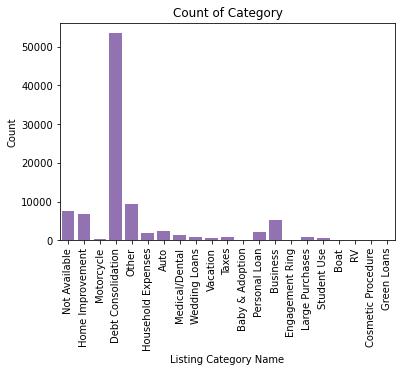

In [31]:
#Let's create a variable for the seaborn color argument
plot_color = sns.color_palette()[4]

# What is the distribution of the Listing Category by count?

sns.countplot(data = df_prosper_clean, x = 'listing_category_name', color = plot_color).set(title='Count of Category', xlabel = 'Listing Category Name', ylabel= 'Count')
plt.xticks(rotation=90);

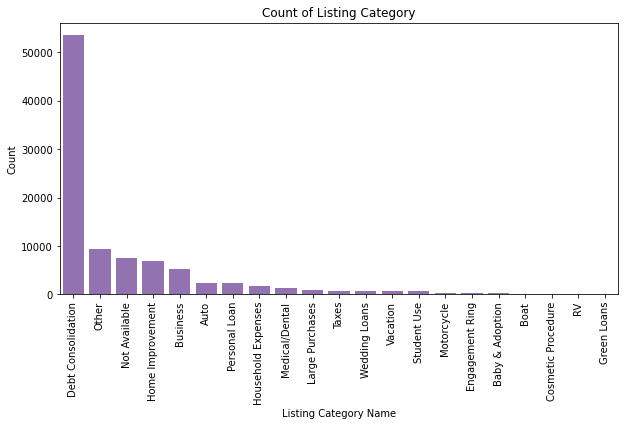

In [32]:
# I'm going to reorder the listing categories in descending order to more easily make observations

plt.figure(figsize = [10, 5])

sns.countplot(data = df_prosper_clean, x = 'listing_category_name', color = plot_color, order = df_prosper_clean['listing_category_name'].value_counts().index).set(title='Count of Listing Category', xlabel = 'Listing Category Name', ylabel= 'Count')
plt.xticks(rotation=90);


**Observation**: The majority of loans, by far, were applied for under the Debt Consolidation category. The count for the following 2 categories, Not Available and Other, were significantly lower by comparison.

### 2. Term Visualization

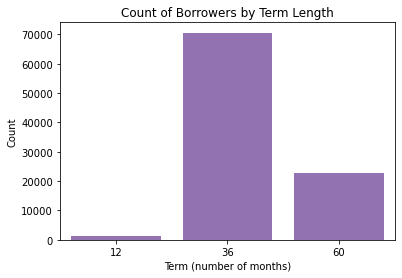

In [33]:
# What is the distribution of the term variable?

sns.countplot(data = df_prosper_clean, x = 'term', color = plot_color).set(title='Count of Borrowers by Term Length', xlabel = 'Term (number of months)', ylabel= 'Count');


**Observation**: Most borrowers have or had a 36 month term for their loan. Chances say that most borrowers in the Debt Consolidation listing category have/had this term length. Could there also be correlation to loan status? Let's look at that variable next.

### 3. Loan Status Visualization

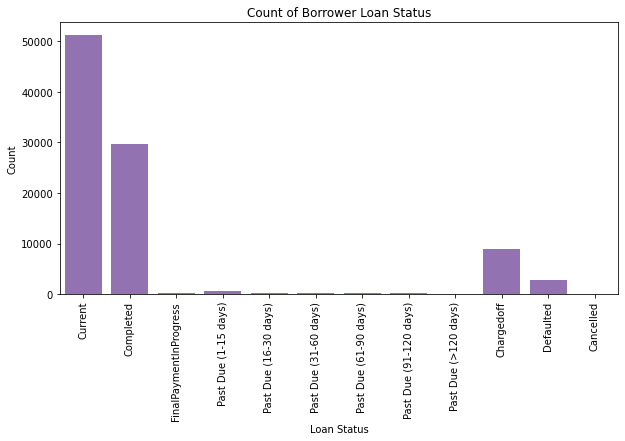

In [34]:
# What is the distribution of the loan status variable?
plt.figure(figsize = [10, 5])
sns.countplot(data = df_prosper_clean, x = 'loan_status', color = plot_color).set(title='Count of Borrower Loan Status', xlabel = 'Loan Status', ylabel= 'Count')
plt.xticks(rotation=90);

In [35]:
# #Let's order this in descending order to more easily make observations
# plt.figure(figsize = [10, 5])
# sns.countplot(data = df_prosper_clean, x = 'loan_status', color = plot_color, order=df_prosper_clean['loan_status'].value_counts().index).set(title='Count of Borrower Loan Status', xlabel = 'Loan Status', ylabel= 'Count')
# plt.xticks(rotation = 90);

**Observation**: Perhaps expectedly, the majority of the loans have a Current or Completed Status. Surprisingly though, the difference between those and the Charged off or Default loans is greater than expected. While this is a positive thing for borrowers and Prosper, it is worth looking into the loans that are Charged Off and Defaulted to see what variables may have correlations to such statuses. Can we expect most of the Current borrowers/loans to be within the Debt Consolidation listing category? Do any of those borrowers share similarities between variables (employment status, income range, debt to income ratio, stated monthly income, etc) that may point to the chance the loan is categorized as Defaulted or Charged Off?

### 4. Original Loan Amount Visualization


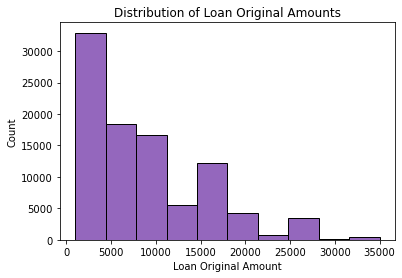

In [36]:
# What is the distribution of the orginal loan amounts distribution?

plt.hist(df_prosper_clean['loan_original_amount'], bins=10, color='tab:purple', ec='black')
plt.title("Distribution of Loan Original Amounts")
plt.xlabel('Loan Original Amount')
plt.ylabel('Count');



The x-axis does not reflect the actual bins, so I'm going to calculate bins


In [37]:
#The x-axis does not reflect the actual bins, so I'm going to calculate bins and assign it to a variable 'bins'
#Before I do so, I want to verify the min and max of the variable to later check validity of bins calculated

print(df_prosper_clean.loan_original_amount.min())
print(df_prosper_clean.loan_original_amount.max())


1000
35000


In [38]:
# Calculate the bins using the .histogram() function in numpy
hist, bins = np.histogram(df_prosper_clean['loan_original_amount'], bins=10)

# Print the bins to verify the calculated bins for this variable
print(bins)

[ 1000.  4400.  7800. 11200. 14600. 18000. 21400. 24800. 28200. 31600.
 35000.]


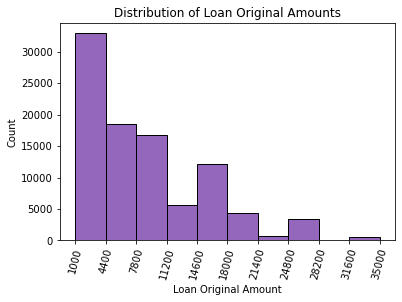

In [39]:
#Let's recreate the histogram again using the calculated bins for our bins argument
#The xticks can be rotated for readability

plt.hist(df_prosper_clean['loan_original_amount'], bins=bins, color='tab:purple', ec='black')
plt.title("Distribution of Loan Original Amounts")
plt.xticks(bins, rotation=75)
plt.xlabel('Loan Original Amount')
plt.ylabel('Count');

**Observation**: The majority of borrowers were given a loan that ranged from 1000-4400, with a decreasing frequency of loans between 4400-7800 and 7800-11,200. Is there a relationship between the lower loan amount, loan status, and listing category? This will be further explored later on.

### 5. Income Range Visualization


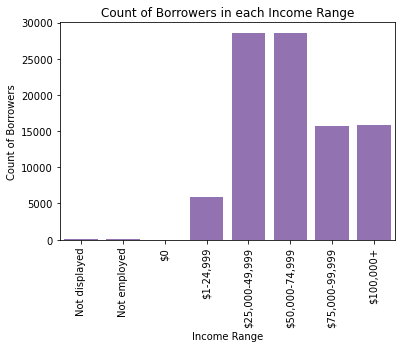

In [40]:
#What is the distribution of income range?

sns.countplot(data = df_prosper_clean, x = 'income_range', color = plot_color).set(title='Count of Borrowers in each Income Range', xlabel = 'Income Range', ylabel= 'Count of Borrowers')
plt.xticks(rotation=90);

There seems to be the same amount of borrowers in certain ranges. By performing a value counts I can see if this holds true compared to the value count for the original dataset:

In [41]:
#value count for income range of cleaned data

df_prosper_clean.income_range.value_counts()

$50,000-74,999    28608
$25,000-49,999    28607
$100,000+         15867
$75,000-99,999    15739
$1-24,999          5866
Not displayed       101
Not employed         56
$0                    0
Name: income_range, dtype: int64

In [42]:
#value count for income range of original data to verify similar values for ranges
#It makes sense that the values decrease as we got rid of values

loan_data.IncomeRange.value_counts()


$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

**Observation**: The removal of null or missing values did not skew the data for our cleaned dataset (df_prosper_clean). We can see the top 2 income ranges are 25,000-49,999 and 50,000-74,999 respectively. It would be interesting to see if the number of Not Employed borrowers is equal to the number of borrowers with an unemployed employment status. 

### 6. Stated Monthly Income Visualization


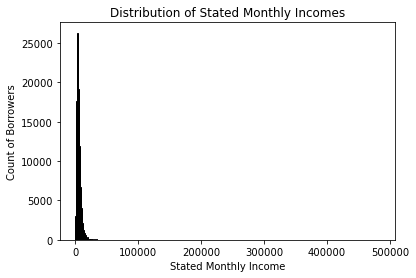

In [43]:
#What is the distribution of stated monthly borrower income?

plt.hist(data=df_prosper_clean, x='stated_monthly_income', bins=300, color='tab:purple', ec='black')
plt.title('Distribution of Stated Monthly Incomes')
plt.xlabel('Stated Monthly Income')
plt.ylabel('Count of Borrowers');

In [44]:
#Let's follow the same steps as before to create bins for the data
#First I want to see some statistics for this column

df_prosper_clean.stated_monthly_income.describe()

count     94844.000000
mean       5764.908747
std        4933.473557
min           0.000000
25%        3333.330000
50%        4916.670000
75%        7020.582500
max      483333.330000
Name: stated_monthly_income, dtype: float64

The maximum stated monthly income is much higher than the mean of the data for this column. There could be outliers that are skewing the data. Let's find those outliers!

In [45]:
#We can find outliers by counting the values that are outside of 3 standard deviations from the mean

std_stated_inc = df_prosper_clean.stated_monthly_income.std()
mean_stated_inc = df_prosper_clean.stated_monthly_income.mean()
outlier_limit_smi = mean_stated_inc + std_stated_inc * 3
len(df_prosper_clean[df_prosper_clean['stated_monthly_income'] >= outlier_limit_smi])


902

There are 902 outliers! We can create this visualization again excluding the outliers to help show the data with less skew.

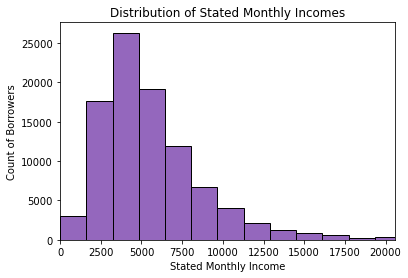

In [46]:
#We can eliminate outliers by using the .xlim() function and setting the upper limit to outlier_limit

plt.hist(data=df_prosper_clean, x='stated_monthly_income', bins=300, color='tab:purple', ec='black')
plt.title('Distribution of Stated Monthly Incomes')
plt.xlabel('Stated Monthly Income')
plt.ylabel('Count of Borrowers')
plt.xlim(0, outlier_limit_smi);

In [47]:
#From this, I want to know the mode of the data and show that on my visualization
#To pass in the mode value as an argument for our plot, I will need to assign an array of the column to a new variable to then calculate the mode with the stats package

array_stated_inc = np.array(df_prosper_clean['stated_monthly_income'])

st.mode(array_stated_inc)[0] #[0]--> This will return only the mode, not the mode and count

array([4166.67])

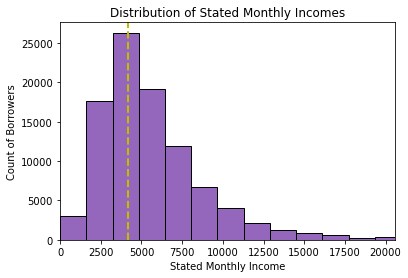

In [48]:
#Let's replot this with the a line representing the mode

plt.hist(data=df_prosper_clean, x='stated_monthly_income', bins=300, color='tab:purple', ec='black')
plt.title('Distribution of Stated Monthly Incomes')
plt.xlabel('Stated Monthly Income')
plt.ylabel('Count of Borrowers')
plt.xlim(0, outlier_limit_smi)
plt.axvline(st.mode(array_stated_inc)[0], color='y', linestyle='dashed', linewidth=2);

In [49]:
df_prosper_clean.stated_monthly_income.describe()

count     94844.000000
mean       5764.908747
std        4933.473557
min           0.000000
25%        3333.330000
50%        4916.670000
75%        7020.582500
max      483333.330000
Name: stated_monthly_income, dtype: float64

 **Observation**: By increasing the number of bins to 300, and then eliminating outliers, we can see the data more clearly. The mode for the Stated Monthly Income is 4166.7, and the mean is 5764.9. The data is still right-skewed after removing outliers. It is worth exploring of there is correlation between stated monthly income, debt to income ratio, and loan status within the Debt Consolidation listing category.
 
**The variable stated monthly income may be ambiguous as this amount is stated by the borrower, and we can possibly see this as it remains skewed after removing outliers. Let's ensure the income was verified with supporting documentation by performing a value_counts() on the stated_monthly_income:**

In [50]:
df_prosper_clean.income_verifiable.value_counts()

True     94684
False      160
Name: income_verifiable, dtype: int64

**According to the value_counts, we can see there is a negligible amount of unverified incomes (False values), leading us to believe the variable is not as ambiguous as initially thought. The majority of the stated incomes were verified with supporting documentation.**

### 8. Debt to Income Ratio Visualization


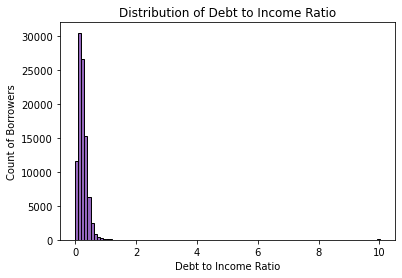

In [51]:
#What is the distribution for the debt to income ratio?

plt.hist(data=df_prosper_clean, x='debt_income_ratio', bins=100, color='tab:purple', ec='black')
plt.title('Distribution of Debt to Income Ratio')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count of Borrowers');

This visualization appears right-skewed, leading me to believe we are dealing with potential outliers. Let's find them like before!

In [52]:
#Like before, we can count the outliers and remove them from the visualization

std_dir = df_prosper_clean.debt_income_ratio.std()
mean_dir = df_prosper_clean.debt_income_ratio.mean()
outlier_limit_dir = mean_dir + std_dir * 3
len(df_prosper_clean[df_prosper_clean['debt_income_ratio'] >= outlier_limit_dir])

363

There are 363 outliers! Let's remove them from the visualization to get a clearer view of the data

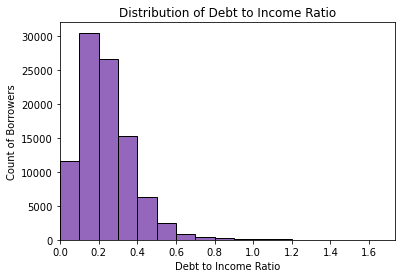

In [53]:
#Visualization of debt to income ratio with outliers removed

plt.hist(data=df_prosper_clean, x='debt_income_ratio', bins=100, color='tab:purple', ec='black')
plt.title('Distribution of Debt to Income Ratio')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count of Borrowers')
plt.xlim(0, outlier_limit_dir);

**Observation**: After removing the outliers, the data is still right-skewed, but more clear. The majority of borrowers have a debt to income ratio between 0.1-0.2, or 10-20%. A lower debt to income ratio implies the borrower's loan monthly payment and stated monthly income are not close in value, which is good news for the borrower! This ratio could be useful to compare to other variables such as loan status. 

*Debt to income ratio accounts for other contributing factors we do not have specific data on. It could be worth creating a new column that finds the ratio between loan payment and stated monthly income to compare against other variables*

Otherwise, this is a feature of interest I'd like to keep in mind for later analysis

### 9. Employment Status Visualization

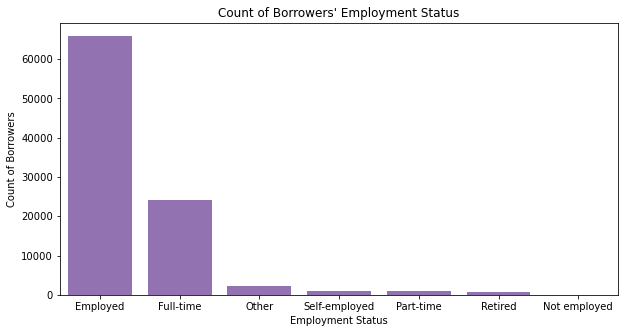

In [54]:
#What is the distribution of employment status?
#May need to specify plot size to best view categories

plt.figure(figsize = [10, 5])
sns.countplot(data = df_prosper_clean, x = 'employment_status', color = plot_color, order=df_prosper_clean['employment_status'].value_counts().index).set(title='Count of Borrowers\' Employment Status', xlabel = 'Employment Status', ylabel= 'Count of Borrowers');


In [55]:
#Are there really zero Not employed? Let's check with a value counts

df_prosper_clean.employment_status.value_counts()

Employed         65895
Full-time        24108
Other             2194
Self-employed      993
Part-time          884
Retired            702
Not employed        68
Name: employment_status, dtype: int64

**Observation**: The majority of borrowers are employed or full-time, which is great for the borrowers and the company! It would be interesting to see if this variable corresponds to loan status and income range. From the previous observation, there were 56 Not employed borrowers indicated by the Income Range variable, but there are 68 borrowers under the Not employed employment status. 

*Though, there is ambiguity between the 'Employed', 'Full-time', and 'Part-time' statuses as full time and part time also mean the borrower is employed.*

> **What is the distinction between those 2 statuses and the status 'Employed?' This needs to be considered during this analysis.**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Of the variables of interest, there were several that prompted further interest for investigation:

- **Term**: Although the distributions showed most loans given had a 36 month term, it would be interesting to see if term length has any bearing on other variables, such as, debt to income ratio and loan status.


- **Listing Category**: The distribution showed Debt Consolidation was the top category, thus reason, selected by borrowers to obtain a loan. This is to be expected as Debt Consolidation is a common reason as to avoid higher interest rates from multiple streams of debt.


- **Loan Status**: This distribution was surprising, with the number of Current and Completed loans being much greater than Defaulted and Charged Off loans. Though it was assumed that most loans would be under the 'Current' status, to find there was a significant difference between the statuses was interesting, and should be further explored. 


- **Original Loan Amount**: The majority of borrowers were given a loan that ranged from 1000-4400, with a decreasing frequency of loans between 4400-7800 and 7800-11,200. It was surprising to see smaller loan amounts occurring more frequently than higher when the top category listed was Debt Consolidation. Correlation between these variables could be interesting.


- **Stated Monthly Income & Debt to Income Ratio**: Both variables had considerable outliers (902 and 363 respectively) which were removed. The data remained to be right-skewed for both variables, but more could be deciphered from the data after removal of outliers.


- **Income Range and Employment Status**: Both variables did not have surprising distributions. Though, depending on how the data is grouped they could prove to be useful in finding correlations between them and loan status, debt to income ratio, or listing category.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> After removing the outliers, no other transformations were performed.

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in the
data based on my features of interest. The variables that will be covered here have been introduced in some
fashion in the previous section (univariate exploration).


The variables that will be investigated through this bivariate exploration are:

- Debt to Income Ratio and Loan Status

- Debt to Income Ratio and Stated Monthly Income

- Stated Monthly Income and Employment Status 

- Employment Status and Loan Status

- Loan Status and Listing Category

- Debt to Income Ratio and Term

I'm curious to explore what correlations exist within these variables that can be pulled into my multivariate analysis. I want to do so keeping in mind my main point of interest: Does the loan Listing Category have any bearing on other variables. Then within the categories, I'm interested to know how other variables (Debt to income ratio, term, employment status, monthly income etc.) may correlate to the status of the loan and how these correlations may help make decisions about providing loans.


### 1. Debt to Income Ratio and Loan Status

I want to explore what is the mean debt to income ratio for each loan status. I'm curious to know if higher ratios are present for loans with the status Charged off or Default, or any of the Past Due statuses. Before doing so I want to re-examine the statistics for the Debt to Income Ratio variable for comparison:

In [56]:
#Statistics for debt_income_ratio

df_prosper_clean.debt_income_ratio.describe()

count    94844.000000
mean         0.271554
std          0.487438
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: debt_income_ratio, dtype: float64

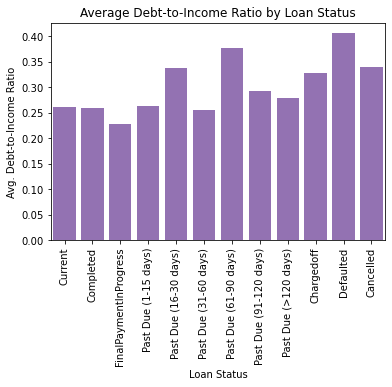

In [57]:
'''Now I can move on to exploring the variables. Here are the steps I will take:
 > Create a dataframe containing just debt_income_ratio and loan_status
 > Group by loan status, aggregate to get the mean of debt_income_ratio
 > Sort loan status by greatest to least debt_income_ratio mean'''


#The creation of a subset of data is required as some plotting functions are delayed or cause the 
#kernel to stop funcitoning when passing in the whole dataset

#This was seen with the debt to income ratio depending on the visualization 
#Handling the dir values prior to plotting solved this issue

df_debt_loan_status = df_prosper_clean[['debt_income_ratio', 'loan_status']].groupby('loan_status').mean('debt_income_ratio')

# sns.barplot(data = df_debt_loan_status, x = 'loan_status', y = 'debt_income_ratio', color = plot_color, order = df_debt_loan_status.debt_income_ratio.value_counts().index).set(title='Average Debt-to-Income Ratio by Loan Status', xlabel='Loan Status', ylabel='Avg. Debt-to-Income Ratio')
# plt.xticks(rotation = 90);
#The code above gave the error- ValueError: Could not interpret input 'loan_status'
#Possible we may need to reset the index so the loan status can be called, as it may be the current index

#Reset the index
df_debt_loan_status = df_debt_loan_status.reset_index()


# sns.barplot(data = df_debt_loan_status, x = 'loan_status', y = 'debt_income_ratio', color = plot_color, order = df_debt_loan_status.debt_income_ratio.value_counts().index).set(title='Average Debt-to-Income Ratio by Loan Status', xlabel='Loan Status', ylabel='Avg. Debt-to-Income Ratio')
# plt.xticks(rotation = 90);
#Appears the order argument is doing some strange things to the x-aixs. The same ordering method doesn't work
#May need to create a list of values from the loan_status to order by

#List of loan_status values to order by
#status_list = df_debt_loan_status['loan_status'].to_list()

sns.barplot(data = df_debt_loan_status, x = 'loan_status', y = 'debt_income_ratio', color = plot_color).set(title='Average Debt-to-Income Ratio by Loan Status', xlabel='Loan Status', ylabel='Avg. Debt-to-Income Ratio')
plt.xticks(rotation = 90);


In [58]:
#By calling the new subset dataframe created, I can see the mean values of debt-to-income ratio for each loan status

df_debt_loan_status

,loan_status,debt_income_ratio
0,Current,0.261071
1,Completed,0.258491
2,FinalPaymentInProgress,0.227273
3,Past Due (1-15 days),0.263768
4,Past Due (16-30 days),0.338091
5,Past Due (31-60 days),0.255776
6,Past Due (61-90 days),0.376218
7,Past Due (91-120 days),0.291841
8,Past Due (>120 days),0.277857
9,Chargedoff,0.327458


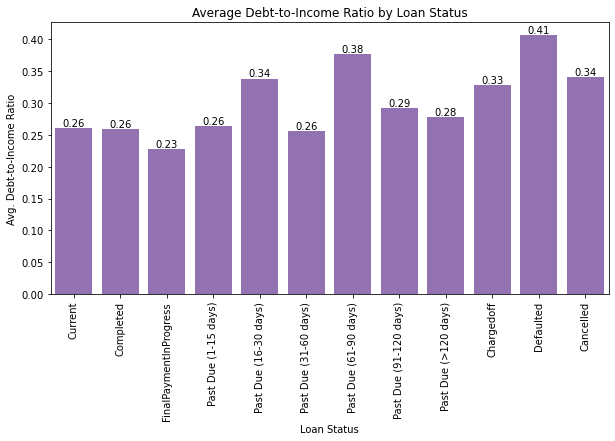

In [59]:
#Steps to show means of each status on bar plot

#Call the plot once more, this time making it larger as we are adding another visual element
plt.figure(figsize = [10, 5])
sns.barplot(data = df_debt_loan_status, x = 'loan_status', y = 'debt_income_ratio', color = plot_color).set(title='Average Debt-to-Income Ratio by Loan Status', xlabel='Loan Status', ylabel='Avg. Debt-to-Income Ratio')
plt.xticks(rotation = 90);

# Get the height of each bar
bar_heights = df_debt_loan_status['debt_income_ratio'].values

# Iterate over the bars
for i, bar in enumerate(bar_heights):
    # Get the x and y coordinates of the bar
    x = i
    y = bar
    # Add the value above the bar using the plt.text() function
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')


**Observations**: This visualization begins to show how there is a correlation between debt to income ratio and loan status. Expectedly, loans that were Defaulted had the highest debt to income ratio on average. Canceled and Charged off loans also had higher debt to income ratios on average. 

Though, surprisingly, the number of days a loan was past due did not seem to have a direct relationship to debt to income ratio. We can see this, for instance, when comparing the average ratio for 'Past Due (>120 days)' and 'Past Due (61-90 days).' Although the latter loan status is indicating for the loan less days overdue, the debt to income ratio is 10% higher than loans that were over 120 days past due. We see this inconsistency in the relationship between number of days overdue and the debt to income ratio throughout the visual of these variables. 

Another surprising find is that Completed loans did not have the lowest on average debt to income ratio. On average, Final Payment in Progress loans had the lowest debt to income ratio. 

It is worth exploring if there is correlation between debt to income ratio and other variables. I want to circle back to my original interest with the data: if there are correlations between these variables withing the Debt Consolidation listing category, since it accounts for most of the loans, and other categories. As I circle back, let's try to find links between variables. Let's explore if there is a correlation between debt to income ratio and stated monthly income next!


### 2. Debt to Income Ratio and Stated Monthly Income

I'm expecting to see that with higher stated monthly incomes, the debt to income ratios will decrease. I think a scatter plot could show any correlation here.

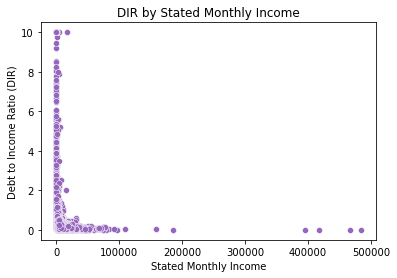

In [60]:
#Plot the scatterplot, x=stated_monthly_income, y=debt_income_ratio

sns.scatterplot(data=df_prosper_clean, x='stated_monthly_income', y='debt_income_ratio', color=plot_color).set(title='DIR by Stated Monthly Income', xlabel='Stated Monthly Income', ylabel='Debt to Income Ratio (DIR)');

Both of these variables had outliers that we removed, so we'll do the same to get a better view of the data!

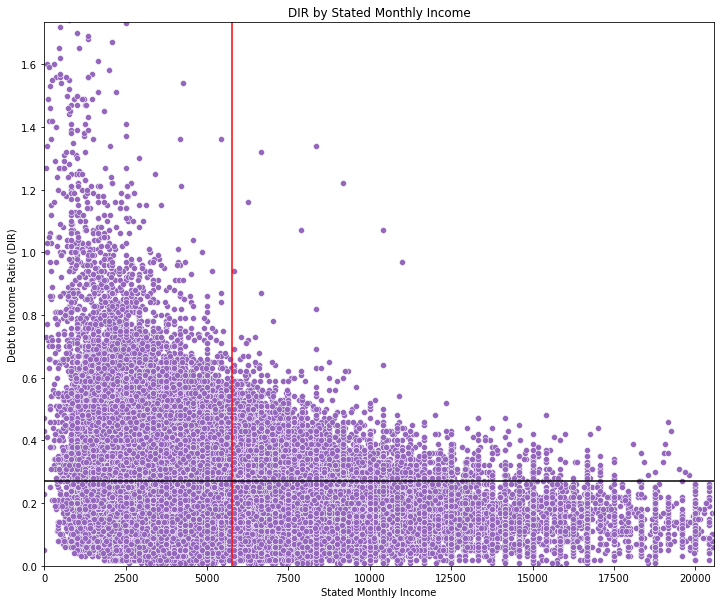

In [61]:
#Set x and y limits using outlier limit variables
#Show the mean DIR 

plt.figure(figsize = [12, 10])
sns.scatterplot(data=df_prosper_clean, x='stated_monthly_income', y='debt_income_ratio', color=plot_color).set(title='DIR by Stated Monthly Income', xlabel='Stated Monthly Income', ylabel='Debt to Income Ratio (DIR)')
plt.xlim(0, outlier_limit_smi)
plt.ylim(0, outlier_limit_dir)
plt.axvline(np.mean(df_prosper_clean['stated_monthly_income']) , color='r')
plt.axhline(np.mean(df_prosper_clean['debt_income_ratio']), color='black');

I included lines to represent the means of the variables. Those means are listed below as well to help make observations:

In [62]:
smi_mean = np.mean(df_prosper_clean['stated_monthly_income'])
dir_mean = np.mean(df_prosper_clean['debt_income_ratio'])

print('The stated monthly income mean is: {}'.format(round(smi_mean, 2)))
print('The debt to income ratio mean is: {}'.format(round(dir_mean, 2)))

The stated monthly income mean is: 5764.91
The debt to income ratio mean is: 0.27


**It seems the visual may include too many points, thus it is overplotted**. So I want to also know how many borrowers have DIRs that are 100% or more of their stated monthly income. This could be important to note as this group of borrowers could show correlations to those that may potentially default if their loan status is Current.

I would also like to know how many borrowers belong to the following categories:
- DIR between 0.5-1
- DIR between 0-0.5
- Ratio of DIR ranges

In [63]:
#Use the len() function to calculate the ratio of DIRs within the different ranges

dir_100_percent = len(df_prosper_clean[df_prosper_clean['debt_income_ratio'] >= 1.0])
dir_50_to_100_percent = len(df_prosper_clean[df_prosper_clean['debt_income_ratio'] < 1.0]) & len(df_prosper_clean[df_prosper_clean['debt_income_ratio'] >= 0.5])
dir_0_to_50_percent = len(df_prosper_clean[df_prosper_clean['debt_income_ratio'] < 0.5]) & len(df_prosper_clean[df_prosper_clean['debt_income_ratio'] >= 0])

total_dir_count = len(df_prosper_clean['debt_income_ratio'])
outlier_dir = len(df_prosper_clean[df_prosper_clean['debt_income_ratio'] >= outlier_limit_dir])
final_denom = total_dir_count-outlier_dir

high_dir_ratio = dir_100_percent/(total_dir_count-outlier_dir)

print('The total number of borrowers is: {}'.format(total_dir_count))
print('The number of DIR outliers is: {}\n'.format(outlier_dir))
print('The number of borrowers with a DIR greater than or equal to 1 (100%) is: {}'.format(dir_100_percent))
print('The ratio of borrowers with DIRs greater than or equal to 1 and the total borrowers, excluding outliers, is: {}\n'.format(round(high_dir_ratio, 2)))

print('The number of borrowers with a DIR between 0.5 and 1 (50-100%) is: {}'.format(dir_50_to_100_percent))
print('The ratio of borrowers with DIRs between 0.5 and 1 and the total borrowers, excluding outliers, is: {}\n'.format(round(dir_50_to_100_percent/final_denom, 2)))

print('The number of borrowers with a DIR between 0 and 0.5 (0-50%) is: {}'.format(dir_0_to_50_percent, 2))
print('The ratio of borrowers with DIRs between 0 and 0.5 and the total borrowers, excluding outliers, is: {}\n'.format(round(dir_0_to_50_percent/final_denom, 2)))


The total number of borrowers is: 94844
The number of DIR outliers is: 363

The number of borrowers with a DIR greater than or equal to 1 (100%) is: 616
The ratio of borrowers with DIRs greater than or equal to 1 and the total borrowers, excluding outliers, is: 0.01

The number of borrowers with a DIR between 0.5 and 1 (50-100%) is: 4116
The ratio of borrowers with DIRs between 0.5 and 1 and the total borrowers, excluding outliers, is: 0.04

The number of borrowers with a DIR between 0 and 0.5 (0-50%) is: 86624
The ratio of borrowers with DIRs between 0 and 0.5 and the total borrowers, excluding outliers, is: 0.92



**Observation**: This visual proved to show numerous points, which led me to reverting back to a univariate breakdown of DIR. I considered using the mean DIR for each binned stated monthly income, but for the sake of this exploration, I will use what I can take away from the current visualization. That is, the debt to income ratio decreased as the stated monthly income increased, which was to be expected. 

**I will end my exploration of these 2 variables here due to overplotting.**

### 3. Stated Monthly Income and Employment Status

Like before I will use an extracted dataframe to show correlations between average Stated Monthly Income and Employment Status. 

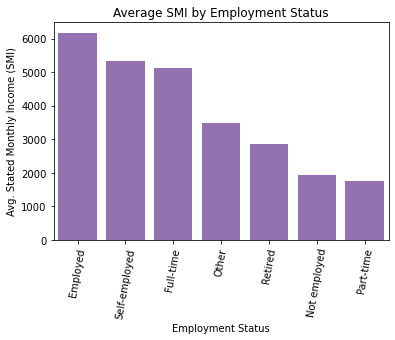

In [64]:
#Create a dataframe that only includes avg stated_monthly_income and employment_status
#This subset of the data was necesary for kernel to continue running/functioning
df_smi_emp_status = df_prosper_clean[['stated_monthly_income', 'employment_status']].groupby('employment_status').mean('stated_monthly_income')\
.sort_values('stated_monthly_income', ascending = False)

#Reset the index
df_smi_emp_status = df_smi_emp_status.reset_index()

#List of employment_status values to order by
emp_status_list = df_smi_emp_status['employment_status'].to_list()

sns.barplot(data = df_smi_emp_status, x = 'employment_status', y = 'stated_monthly_income', color = plot_color, order = emp_status_list).set(title='Average SMI by Employment Status', xlabel='Employment Status', ylabel='Avg. Stated Monthly Income (SMI)')
plt.xticks(rotation = 80);


Just like in the last bar plot, I want to see the mean for each employment status on top of the bar. Let's do it!

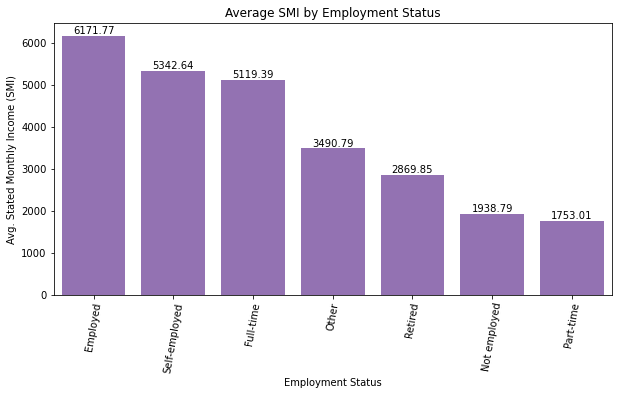

In [65]:
#Call the plot once more, this time making it larger as we are adding another visual element
plt.figure(figsize = [10, 5])
sns.barplot(data = df_smi_emp_status, x = 'employment_status', y = 'stated_monthly_income', color = plot_color, order = emp_status_list).set(title='Average SMI by Employment Status', xlabel='Employment Status', ylabel='Avg. Stated Monthly Income (SMI)')
plt.xticks(rotation = 80);

# Get the height of each bar
bar_heights = df_smi_emp_status['stated_monthly_income'].values

# Iterate over the bars
for i, bar in enumerate(bar_heights):
    # Get the x and y coordinates of the bar
    x = i
    y = bar
    # Add the value above the bar using the plt.text() function
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

**Observation**: Not surprisingly, Employed borrowers have the highest average stated monthly income (SMI). Though, it would be interesting to see how these variables correlate to loan status and listing category. 

Something surprising found here is that the employment status with the lowest average SMI is Part-time. This is unexpected as one could think the lowest average SMI would belong to the 'Not employed' borrower employment status. What other factors could be leading to this outcome? 

**Now to return to a point I made previously, the reason for separating the statuses 'Full-time' and 'Part-time' vs 'Employed' seems ambiguous. It is still not clear why these statuses are distinct. This makes me hesitant to work with the variable as this could mean the data could be skewed with overlapping statuses. For instance, a borrower may have selected 'Employed' while also being a part-time worker. In this case, results for any of the statuses where overlap could occur may be skewed. A suggestion to adjust status labels will be later discussed.**

### 4. Employment Status and Loan Status

Moving forward from the last visual, let's see if there are any correlations between employment status and loan status. It could be expected that the majority of Employed borrowers have a 'Current' loan status based on previous explorations in this analysis.

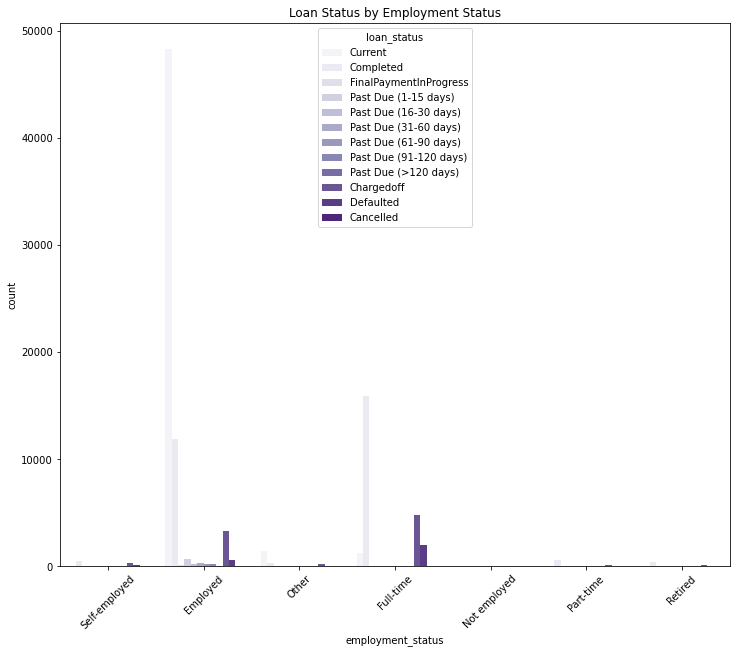

In [66]:
#Using a count plot to record the number of borrowers in each 

plt.figure(figsize = [12, 10])
sns.countplot(data = df_prosper_clean, x = 'employment_status', hue = 'loan_status', palette = 'Purples').set(title='Loan Status by Employment Status')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45);

The data here is hard to see, so we can try using to limit the amount of loan status categories to investigate. I'm more interested in the Current, Completed, Defaulted, Canceled, and Charged off loan statuses.

In [67]:
#Inspect the categories present in df_prosper_clean

df_prosper_clean['loan_status'].value_counts()

Current                   51170
Completed                 29732
Chargedoff                 9021
Defaulted                  2890
Past Due (1-15 days)        714
Past Due (31-60 days)       322
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       241
FinalPaymentInProgress      187
Past Due (>120 days)         14
Cancelled                     1
Name: loan_status, dtype: int64

In [68]:
#Let's make another copy of df_prosper_clean in case we want those variables later
df_prosper_clean_1 = df_prosper_clean.copy()

# Filter by wanted loan statuses
condition = (df_prosper_clean_1['loan_status'] == 'Completed') | (df_prosper_clean_1['loan_status'] == 'Defaulted') | (df_prosper_clean_1['loan_status'] == 'Chargedoff') | (df_prosper_clean_1['loan_status'] == 'Current') | (df_prosper_clean_1['loan_status'] == 'Cancelled')

#Apply condition to dataframe
df_prosper_clean_1 = df_prosper_clean_1[condition]

#Check that other statuses have been removed
df_prosper_clean_1['loan_status'].value_counts()

Current                   51170
Completed                 29732
Chargedoff                 9021
Defaulted                  2890
Cancelled                     1
FinalPaymentInProgress        0
Past Due (1-15 days)          0
Past Due (16-30 days)         0
Past Due (31-60 days)         0
Past Due (61-90 days)         0
Past Due (91-120 days)        0
Past Due (>120 days)          0
Name: loan_status, dtype: int64

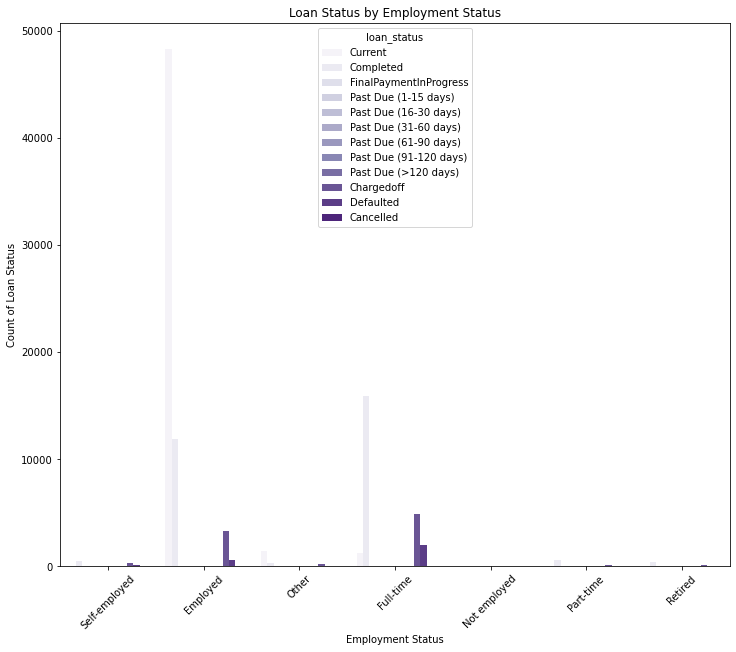

In [69]:
#With fewer loan status categories, the data should be more visible

plt.figure(figsize = [12, 10])
sns.countplot(data = df_prosper_clean_1, x = 'employment_status', hue = 'loan_status', palette = 'Purples').set(title='Loan Status by Employment Status', xlabel='Employment Status', ylabel='Count of Loan Status')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45);

Out of curiosity, being that the Current loan status is pulling the y-axis values up, let's eliminate that category as well to better view the data for the other statuses.

In [70]:
# Remove unwanted loan statuses
condition = (df_prosper_clean_1['loan_status'] == 'Completed') | (df_prosper_clean_1['loan_status'] == 'Defaulted') | (df_prosper_clean_1['loan_status'] == 'Chargedoff') | (df_prosper_clean_1['loan_status'] == 'Cancelled')

#Apply condition to dataframe
df_prosper_clean_1 = df_prosper_clean_1[condition]

#Check that other statuses have been removed
df_prosper_clean_1['loan_status'].value_counts()

Completed                 29732
Chargedoff                 9021
Defaulted                  2890
Cancelled                     1
Current                       0
FinalPaymentInProgress        0
Past Due (1-15 days)          0
Past Due (16-30 days)         0
Past Due (31-60 days)         0
Past Due (61-90 days)         0
Past Due (91-120 days)        0
Past Due (>120 days)          0
Name: loan_status, dtype: int64

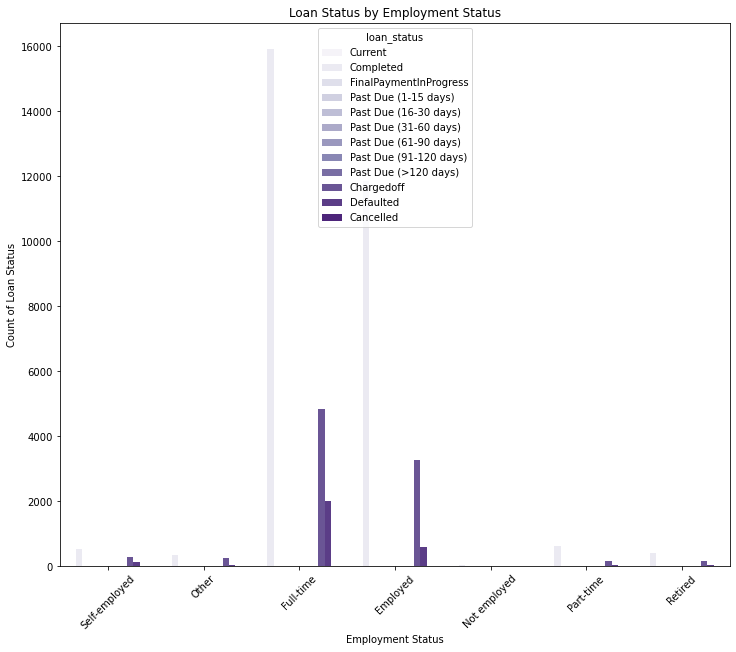

In [72]:
#With 'Current' removed from the loan status categories, we should be able to examine the other categories to find possible correlations

plt.figure(figsize = [12, 10])
sns.countplot(data = df_prosper_clean_1, x = 'employment_status', hue = 'loan_status', palette = 'Purples').set(title='Loan Status by Employment Status', xlabel='Employment Status', ylabel='Count of Loan Status')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45);

**Observation**: From the first visualization, including 'Current,' we can see the majority of Current loans are provided to borrowers in the 'Employed' status. While this is expected, it is a positive reassurance for the company that loans are mostly provided to those with employment. 

Also, we can see that borrowers with full-time employment are the most likely to complete their loan. As per what I mentioned before, the fact that Full-time employment shows more completed loan statuses than 'Employed' borrowers could point to skewed data. With additional data, it could be interesting to find what factors differentiate the 'Employed' and 'Full-Time' categories, and then assess other factors that may have contributed to Full-time employed borrowers completed more loans.

With the data available, the next bivariate exploration step I'd like to take is to circle back to loan status and listing category to see any final correlations between features of interest.

### 5. Loan Status and Listing Category

From the Univariate Exploration, we know that a significant amount of loans are categorized as Debt Consolidation. While the difference is quite large between the number of loans in that category and the ones that follow. It could be worth only assessing correlations within those 4 categories to better view our data.

In [73]:
#Let's see the value_counts() for listing_category_name to see the difference between categories

df_prosper_clean.listing_category_name.value_counts()

Debt Consolidation    53499
Other                  9431
Not Available          7484
Home Improvement       6917
Business               5192
Auto                   2350
Personal Loan          2259
Household Expenses     1767
Medical/Dental         1382
Large Purchases         795
Taxes                   783
Wedding Loans           729
Vacation                712
Student Use             604
Motorcycle              289
Engagement Ring         201
Baby & Adoption         191
Boat                     83
Cosmetic Procedure       82
RV                       49
Green Loans              45
Name: listing_category_name, dtype: int64

The top 5 Categories are Debt Consolidation, Other, Not Available, Home Improvement, and Business. Let's separate these further when exploring the variables. One visualization will be made for Debt Consolidation and count of loan statuses, and another to explore the other four listing categories and the count of loan statuses in them to better view the data.

**It is important to note here that 'Other' and 'Not Available' are the second and third most occurring listing categories, but we do not know much about the categories. They are somewhat ambiguous in that we can not make clear assessments of correlation happening with those categories. While we can say there is correlation with either, we cannot say *what* exactly either category includes.**

In [74]:
#Before filtering the cleaned dataframe, we can make a copy as to not alter the original cleaned data
df_prosper_clean_2 = df_prosper_clean.copy()

# Remove unwanted loan statuses like before to gain better insight of any correlations
condition_1 = (df_prosper_clean_2['loan_status'] == 'Completed') | (df_prosper_clean_2['loan_status'] == 'Defaulted') | (df_prosper_clean_2['loan_status'] == 'Chargedoff') | (df_prosper_clean_2['loan_status'] == 'Current') | (df_prosper_clean_2['loan_status'] == 'Cancelled')

#Apply condition_1 to dataframe
df_prosper_clean_2 = df_prosper_clean_2[condition_1]

#Check that other statuses have been removed
df_prosper_clean_2['loan_status'].value_counts()

Current                   51170
Completed                 29732
Chargedoff                 9021
Defaulted                  2890
Cancelled                     1
FinalPaymentInProgress        0
Past Due (1-15 days)          0
Past Due (16-30 days)         0
Past Due (31-60 days)         0
Past Due (61-90 days)         0
Past Due (91-120 days)        0
Past Due (>120 days)          0
Name: loan_status, dtype: int64

In [75]:
# Remove unwanted listing categories to gain better insight of any correlations
condition_2 = df_prosper_clean_2['listing_category_name'] == 'Debt Consolidation'

#Apply condition_2 to dataframe
df_prosper_clean_2 = df_prosper_clean_2[condition_2]

#Check that other categories have been removed
df_prosper_clean_2['listing_category_name'].value_counts()

Debt Consolidation    52363
Name: listing_category_name, dtype: int64

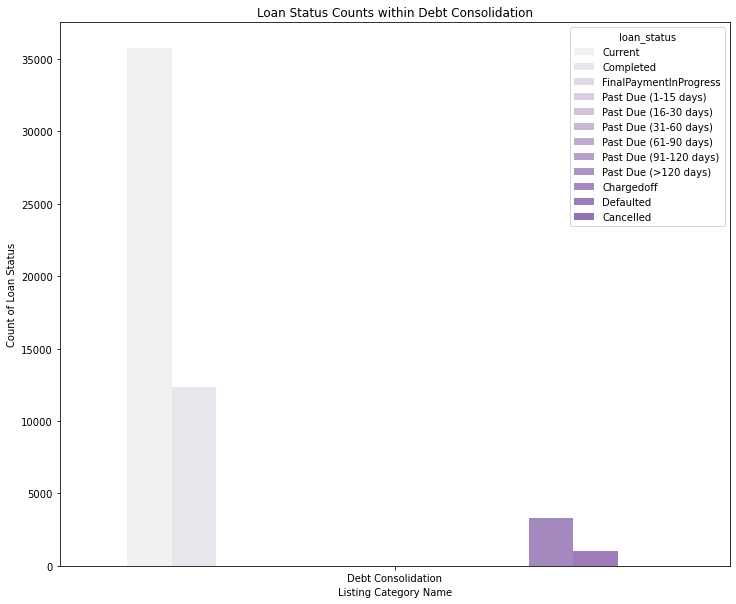

In [76]:
#Now we can create the plot to show the loan status counts for Debt Consolidation 
plt.figure(figsize = [12, 10])
sns.countplot(data = df_prosper_clean_2, x = 'listing_category_name', hue = 'loan_status', color = plot_color).set(title='Loan Status Counts within Debt Consolidation', xlabel='Listing Category Name', ylabel='Count of Loan Status');

While we can make observations from this visualization, let's not forget about the other 4 categories. It's important to note that the y-axis for the following visual will not show the same limits. We can have a better view of any possible correlations, but should note the smaller totals.

In [77]:
#Before filtering the cleaned dataframe, we can make a copy as to not alter the original cleaned data
df_prosper_clean_3 = df_prosper_clean.copy()

#Apply condition_1 to dataframe
df_prosper_clean_3 = df_prosper_clean_3[condition_1]

#Check that other statuses have been removed
df_prosper_clean_3['loan_status'].value_counts()

Current                   51170
Completed                 29732
Chargedoff                 9021
Defaulted                  2890
Cancelled                     1
FinalPaymentInProgress        0
Past Due (1-15 days)          0
Past Due (16-30 days)         0
Past Due (31-60 days)         0
Past Due (61-90 days)         0
Past Due (91-120 days)        0
Past Due (>120 days)          0
Name: loan_status, dtype: int64

In [78]:
#Let's filter for the other four categories: Other, Not Available, Home Improvement, Business

condition_3 = (df_prosper_clean_3['listing_category_name'] == 'Other') | (df_prosper_clean_3['listing_category_name'] == 'Not Available') | (df_prosper_clean_3['listing_category_name'] == 'Home Improvement') | (df_prosper_clean_3['listing_category_name'] == 'Business')

#Apply condition_3 to dataframe
df_prosper_clean_3 = df_prosper_clean_3[condition_3]

#Check that other statuses have been removed
df_prosper_clean_3['listing_category_name'].value_counts()

Other               9220
Not Available       7483
Home Improvement    6704
Business            5063
Name: listing_category_name, dtype: int64

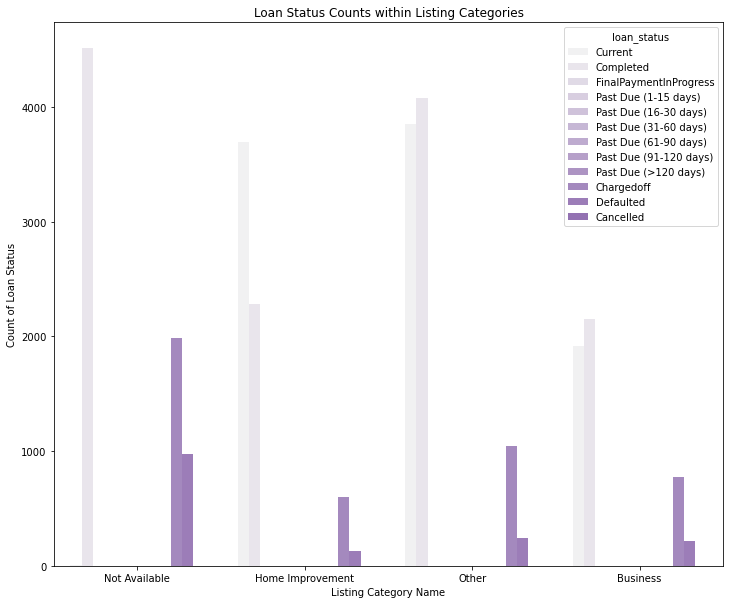

In [79]:
#Now we can create the plot to show the loan status counts for Other, Not Available, Home Improvement, Business 
plt.figure(figsize = [12, 10])
sns.countplot(data = df_prosper_clean_3, x = 'listing_category_name', hue = 'loan_status', color = plot_color).set(title='Loan Status Counts within Listing Categories', xlabel='Listing Category Name', ylabel='Count of Loan Status');

**Observation**: Within the Debt Consolidation listing category, the majority of loans were also under the 'Current' loan status. It was surprising to see that even within the category, the correlations remained true, that there is a significant difference in the Current, Completed and Defaulted, Charged off, Canceled loan statuses. The Completed loan status count was about 3 times greater than the Charged off loans! It is good for the company that the majority of loans fall under either the 'neutral or positive' loan statuses (Current and Completed respectively)

In terms of the other 4 categories, the correlations are somewhat different: They show that the highest recorded loan status is actually Completed, though with Current following behind in most cases.

In either visualization, we can note that the correlation between loan status and the listing category is that there is a strong correlation between the Current loan status and Debt Consolidation listing category, supporting that most borrowers seek out loans towards Debt Consolidation. 

Moving forward, it would be interesting to see what further correlations can be found within the Debt Consolidation listing category between, debt to income ratio, and loan status. 

But another thought is, what about term? Term was explored earlier in this analysis. I want to see if there are any correlations between term and debt to income ratio as this could lead to other correlations with loan status outcomes.

### 6. Term and Debt to Income Ratio

I expect to find that the distribution will show a higher mean debt to income ratio for loans with 36 month terms since there are more borrowers with this type of loan term. 

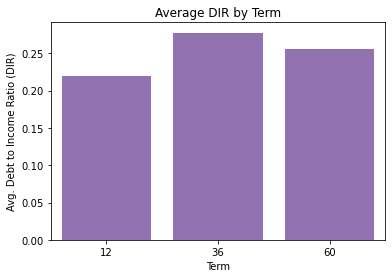

In [80]:
#Create a dataframe that only includes avg debt_income_ratio and term

df_dir_term = df_prosper_clean[['debt_income_ratio', 'term']].groupby('term').mean('debt_income_ratio')

#Reset the index
df_dir_term = df_dir_term.reset_index()

# #List of term values to order by
# emp_status_list = df_dir_term['term'].to_list()

sns.barplot(data = df_dir_term, x = 'term', y = 'debt_income_ratio', color = plot_color).set(title='Average DIR by Term', xlabel='Term', ylabel='Avg. Debt to Income Ratio (DIR)');


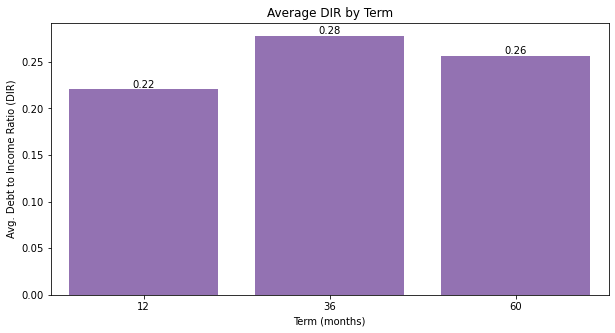

In [81]:
#Call the plot once more, this time making it larger as we are adding another visual element
plt.figure(figsize = [10, 5])
sns.barplot(data = df_dir_term, x = 'term', y = 'debt_income_ratio', color = plot_color).set(title='Average DIR by Term', xlabel='Term (months)', ylabel='Avg. Debt to Income Ratio (DIR)');

# Get the height of each bar
bar_heights = df_dir_term['debt_income_ratio'].values

# Iterate over the bars
for i, bar in enumerate(bar_heights):
    # Get the x and y coordinates of the bar
    x = i
    y = bar
    # Add the value above the bar using the plt.text() function
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

Let's pull up the overall mean debt to income ratio to compare with what is seen in this visualization:

In [82]:
df_prosper_clean.debt_income_ratio.mean()

0.2715539201214638

**Observation**: As expected, due to there being more borrowers present in the dataset with 36 month terms, we can see the mean DIR (0.28) is close to the overall mean (0.27). What is interesting here is that the 12 month terms have an average DIR that is slightly lower than the overall mean. Though there doesn't seem to be a strong correlation between term length and DIR, this variable will be investigated further to answer the following questions: What else is going on with the loans that have 36 month terms? Is there a correlation between term length and loan status? Listing category? When introducing other variables, what correlation is there between term and loan status?

These variable will be explored further.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Of the variables pulled into the Bivariate Exploration, here are some relationships observed between them:

- **Debt to Income Ratio and Loan Status**: One correlation that was observed is that loans that were defaulted had the highest debt to income ratio on average. Canceled and Charged off loans also had higher debt to income ratios on average.

> The number of days a loan was past due did not seem to have a correlation to debt to income ratio. We see this inconsistency in the relationship between number of days overdue and the debt to income ratio throughout the visual of these variables.

> Another surprising find is that Completed loans did not have the lowest on average debt to income ratio. On average, Final Payment in Progress loans had the lowest debt to income ratio.


- **Debt to Income Ratio and Stated Monthly Income**: These variables did not yield clear results as there was overplotting. Though, it was interesting to see that the shape of the points suggested there was an inverse relationship between the stated monthly income and the debt to income ratio. Another interesting find was that a small number of borrowers with lower stated monthly incomes had a debt to income ratio the was 1 or higher (>= 100%). While interesting, due to overplotting these findings will not be further explored.


- **Stated Monthly Income and Employment Status**: These variables showed a positive correlation between employed borrowers and average stated monthly income (SMI). 


- **Employment Status and Loan Status**: From the first visualization, which includes 'Current,' we can see there is a positive correlation between Current loans are provided to borrowers in the 'Employed' status. We can also see a positive correlation between borrowers with full-time employment and the loan status 'Completed'. 

>**Now to return to a point I made previously, the reason for separating the statuses 'Full-time' and 'Part-time' vs 'Employed' seems ambiguous. It is still not clear why these statuses are distinct. This makes me hesitant to work with the variable as this could mean the data could be skewed with overlapping statuses. For instance, a borrower may have selected 'Employed' while also being a part-time worker. In this case results for any of the statuses where overlap could occur may be skewed. A suggestion to adjust status labels will be later discussed.**

- **Loan Status and Listing Category**: Within the Debt Consolidation listing category, the majority of loans were also under the 'Current' loan status. In either visualization, we can note that there is a positive correlation between loan status 'Current' and the listing category 'Debt Consolidation', supporting that most borrowers seek out loans towards Debt Consolidation.


- **Term and Debt to Income Ratio (DIR)**: Although this comparison yielded similar average DIRs to the overall data, thus providing not much correlation, there could be more to the 'term' variable when compared to multiple other variables. These variables are worth exploring further to see if they have any bearing on loan status within listing categories (therefore connecting back to my original point of interest: What is happening in these listing categories? What correlations and significance can we find by comparing certain variables?)



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- **Stated Monthly Income and Employment Status**:
> Something surprising found here is that there was also a correlation between Part-time employment status and lowest average SMI. This is unexpected as one could think the lowest average SMI would belong to the 'Not employed' borrower employment status. What other factors could be leading to this outcome? Could this unusual finding be due to overlapping status selections?

## Multivariate Exploration

> In this section we will investigate your data even
further by comparing over 3 variables in one visualization: Term, DIR, Loan Status, and Listing Category Name.

> We will also investigate: DIR, Loan Status, Listing Category, and Income Range

- These final variables were chosen based on previous exploration. There was a positive correlation between current loans statuses and the Debt Consolidation listing category. We may see some interesting correlations between the variables when introducing DIR and term. Another variable assessed in the univariate exploration that I would like to introduce again is the income range. We learned the distribution of data in the income range variable is more even and may help yield observations with more certainty.

### DIR, Loan Status, Listing Category, and Term

In [90]:
#Let's begin by building a dataframe we can later plot that contains the features of interest

df_dir_ls_lc = df_prosper_clean[['debt_income_ratio', 'loan_status', 'listing_category_name', 'term']].groupby(['listing_category_name', 'loan_status', 'term']).mean('debt_income_ratio')

#Reset the index to make values able to be called
df_dir_ls_lc = df_dir_ls_lc.reset_index()

#Round the dir values to 2 decimal places
df_dir_ls_lc['debt_income_ratio'] = df_dir_ls_lc['debt_income_ratio'].round(2)

#Call and inspect dataframe
df_dir_ls_lc

,listing_category_name,loan_status,term,debt_income_ratio
0,Auto,Current,12,0.05
1,Auto,Current,36,0.22
2,Auto,Current,60,0.26
3,Auto,Completed,12,0.19
4,Auto,Completed,36,0.21
5,Auto,Completed,60,0.19
6,Auto,FinalPaymentInProgress,12,NaN
7,Auto,FinalPaymentInProgress,36,0.20
8,Auto,FinalPaymentInProgress,60,NaN
9,Auto,Past Due (1-15 days),12,NaN


In [91]:
#Like before, I will filter down the data for the 5 statuses of interest: Completed, Defaulted, Chargedoff, Current, Cancelled

# Remove unwanted loan statuses like before to gain better insight of any correlations
condition_1 = (df_dir_ls_lc['loan_status'] == 'Completed') | (df_dir_ls_lc['loan_status'] == 'Defaulted') | (df_dir_ls_lc['loan_status'] == 'Chargedoff') | (df_dir_ls_lc['loan_status'] == 'Current') | (df_dir_ls_lc['loan_status'] == 'Cancelled')

#Apply condition_1 to dataframe
df_dir_ls_lc = df_dir_ls_lc[condition_1]

#Check that other statuses have been removed
df_dir_ls_lc['loan_status'].value_counts()

Current                   63
Completed                 63
Chargedoff                63
Defaulted                 63
Cancelled                 63
FinalPaymentInProgress     0
Past Due (1-15 days)       0
Past Due (16-30 days)      0
Past Due (31-60 days)      0
Past Due (61-90 days)      0
Past Due (91-120 days)     0
Past Due (>120 days)       0
Name: loan_status, dtype: int64

In [92]:
#Let's rename the loan status column using a more readable format
#This will assist when plotting later

rename_dict_2 = {'loan_status':'Loan Status'
                }

df_dir_ls_lc = df_dir_ls_lc.rename(columns=rename_dict_2)

df_dir_ls_lc

,listing_category_name,Loan Status,term,debt_income_ratio
0,Auto,Current,12,0.05
1,Auto,Current,36,0.22
2,Auto,Current,60,0.26
3,Auto,Completed,12,0.19
4,Auto,Completed,36,0.21
5,Auto,Completed,60,0.19
27,Auto,Chargedoff,12,0.21
28,Auto,Chargedoff,36,0.21
29,Auto,Chargedoff,60,0.21
30,Auto,Defaulted,12,0.07


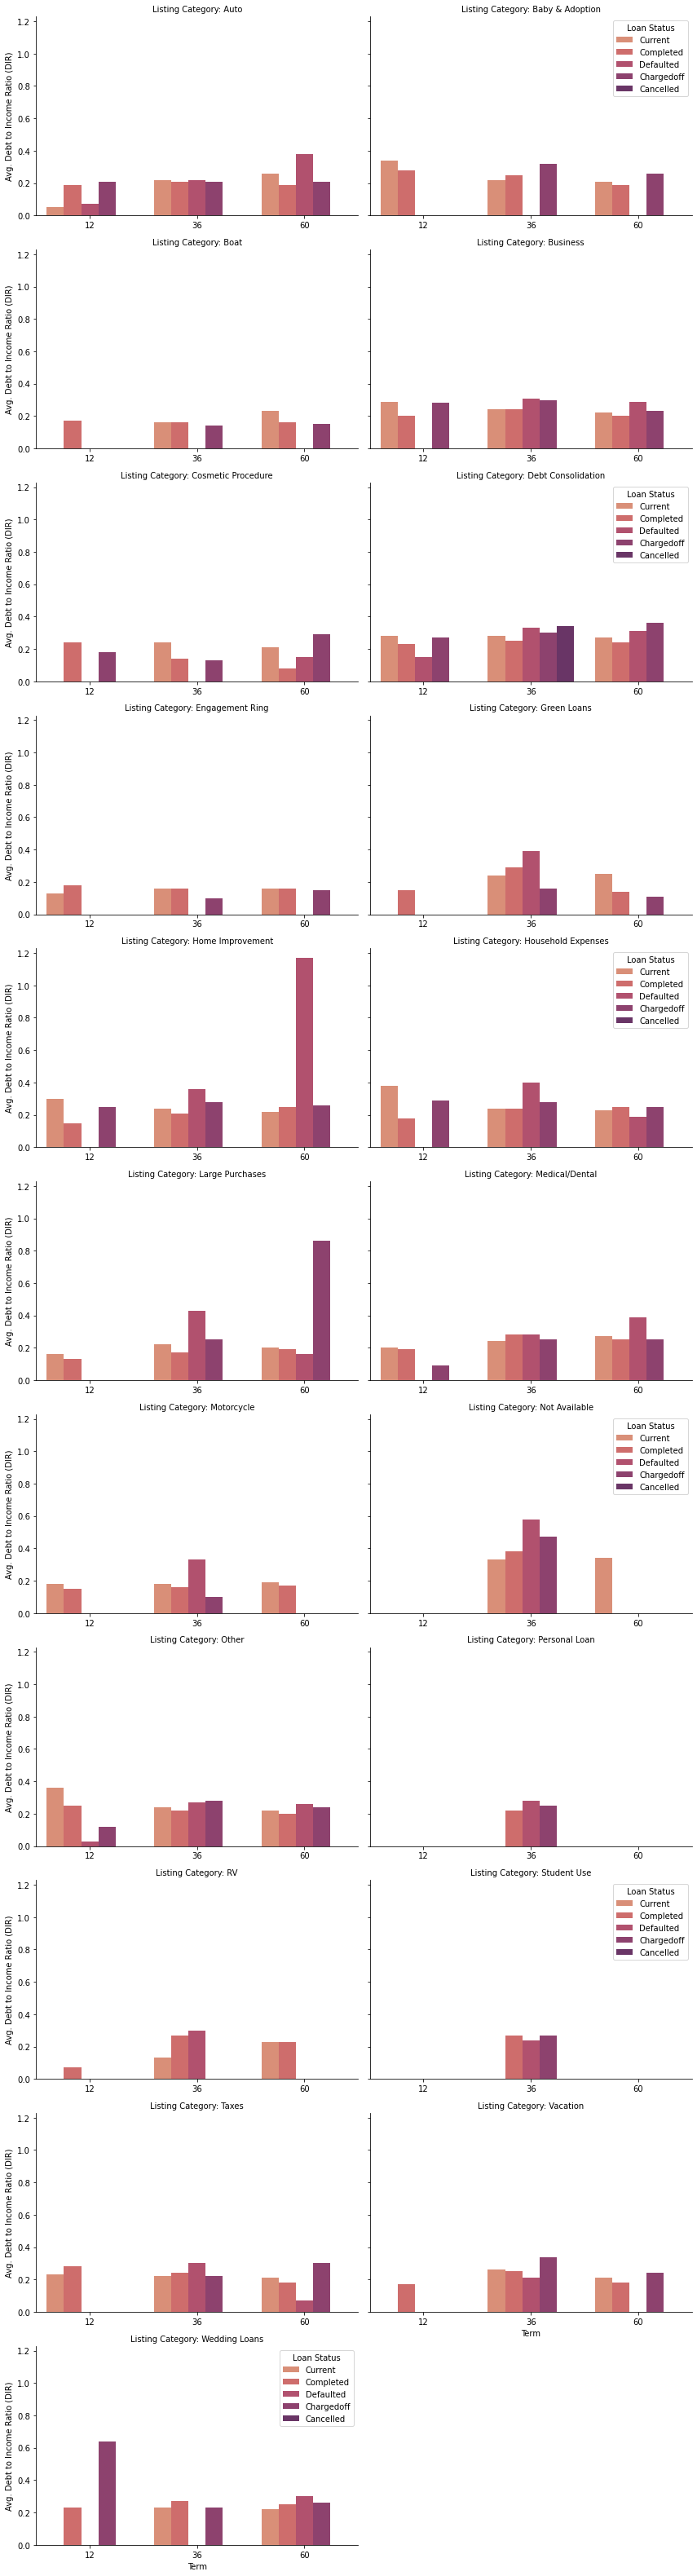

In [93]:
#Before plotting, let's create an ordered list of loan statuses that we can assign in the argument 'hue_ordered'
#Doing so will help readability as well
hue_ordered = ['Current', 'Completed', 'Defaulted', 'Chargedoff', 'Cancelled']


#Create sns.catplot()
g = sns.catplot(
        x='term', 
        y='debt_income_ratio', 
        data=df_dir_ls_lc,
        hue='Loan Status',
        hue_order=hue_ordered,
        legend=False,
        sharex=False,
        palette= 'flare',
        height=4, 
        aspect=1.5,
        kind='bar', 
        col ='listing_category_name',
        col_wrap=2
)


g.set_titles(template='Listing Category: {col_name}')
g.set_ylabels(label='Avg. Debt to Income Ratio (DIR)')
g.set_xlabels(label='Term')

#The legend was located in the vertical center, but this made it difficult to see while inspecting the grids as there was only one amongst all the grids
g.fig.get_axes()[1].legend(title='Loan Status', loc='upper right')
g.fig.get_axes()[5].legend(title='Loan Status', loc='upper right')
g.fig.get_axes()[9].legend(title='Loan Status', loc='upper right')
g.fig.get_axes()[13].legend(title='Loan Status', loc='upper right')
g.fig.get_axes()[17].legend(title='Loan Status', loc='upper right')
g.fig.get_axes()[20].legend(title='Loan Status', loc='upper right');

The above visualization shows a breakdown by listing category, the average DIR, term, and loan status. Before making any observations, I realize while the subset of data allows me to better view the data, and helps with kernel functionality, I believe there is an important feature missing from these grids, and that is the error bar. Since we are using an aggregate value, mean values in this case, it is important to include error bars.

In a plot, an error bar shows the amount of uncertainty in a variable. This is important to observe as we approach the end of the exploration. In the following multivariate visualization, error bars will be considered and displayed to observe the variance in our data. The size of an error bar is directly related to the amount of variance and uncertainty in the value. 

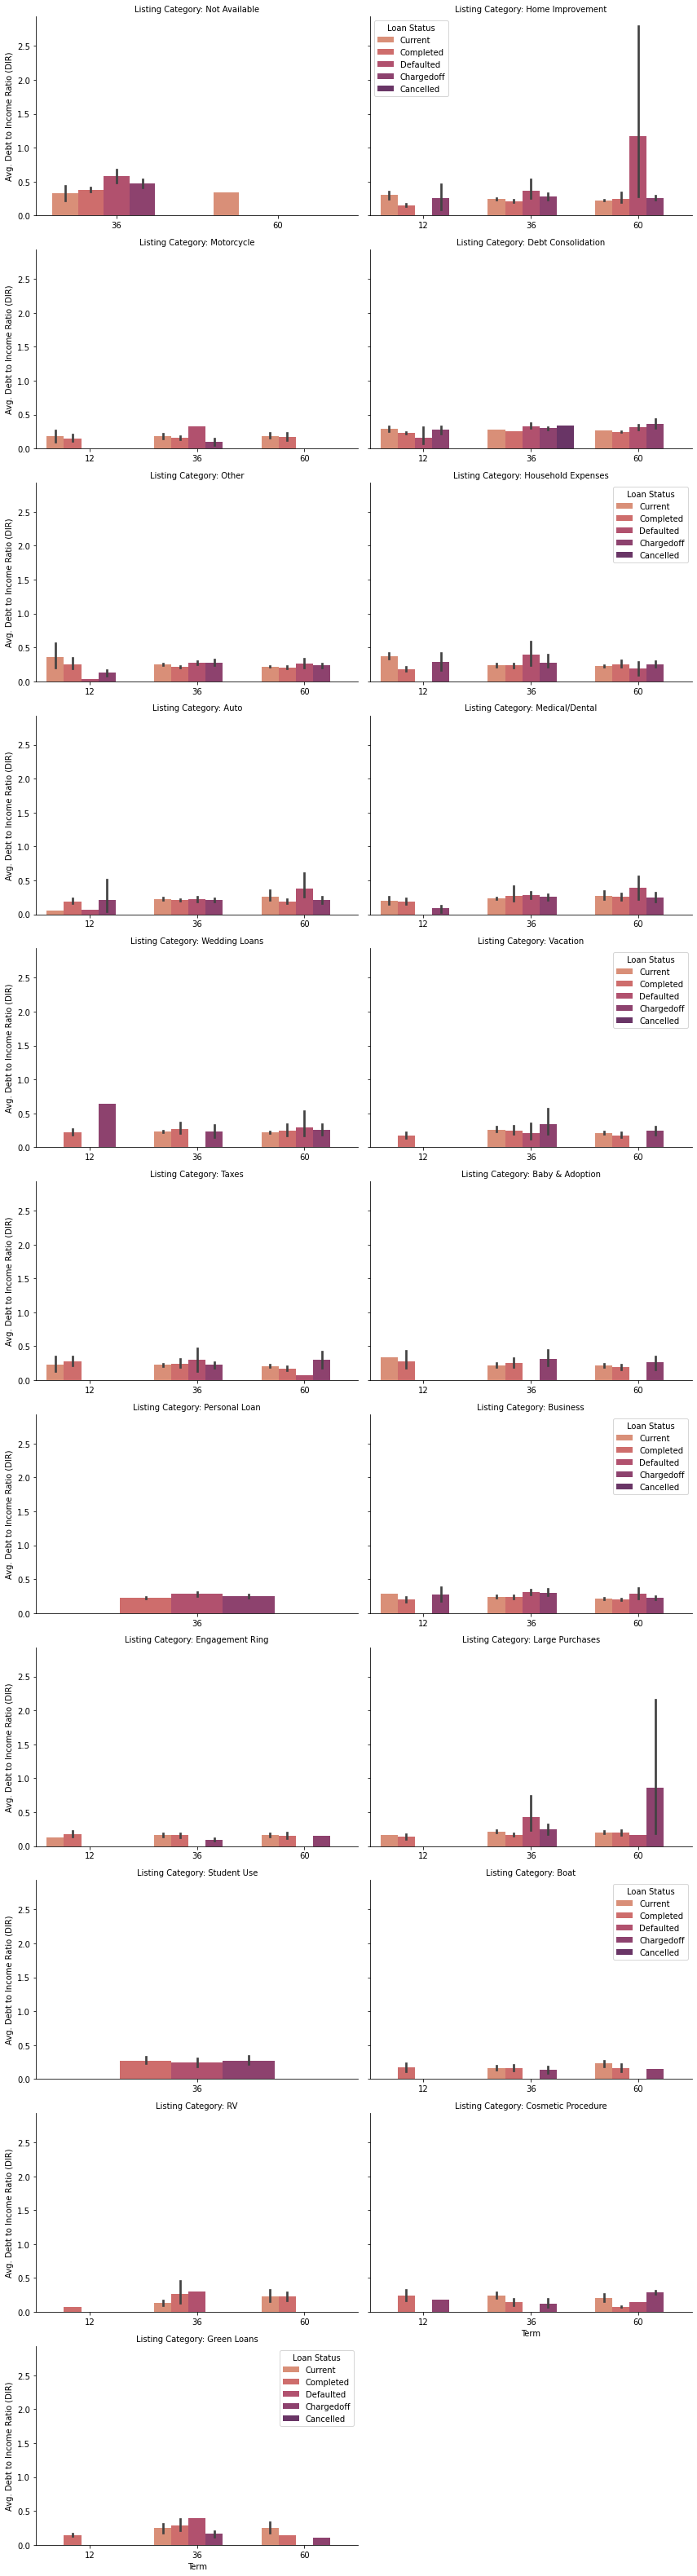

In [94]:
'''This cell shows a visualization of the variables above, but from the clean dataset (df_prosper_clean).
If there is interest in seeing the error, then refer to the output of this cell, as the visualization includes the error
bar. '''

hue_ordered = ['Current', 'Completed', 'Defaulted', 'Chargedoff', 'Cancelled']


#Create sns.catplot() using the cleaned dataset df_prosper_clean
g = sns.catplot(
        x='term', 
        y='debt_income_ratio', 
        data=df_prosper_clean,
        hue='loan_status',
        hue_order=hue_ordered,
        legend=False,
        sharex=False,
        #sharey=False, #Including this parameter better shows the length of the error bars for further investigation, 
                    #but can be misleading due to varied y-axis values
        palette= 'flare',
        height=4, 
        aspect=1.5,
        kind='bar', 
        col ='listing_category_name',
        col_wrap=2
)


g.set_titles(template='Listing Category: {col_name}')
g.set_ylabels(label='Avg. Debt to Income Ratio (DIR)')
g.set_xlabels(label='Term')

#The legend was located in the vertical center, but this made it difficult to see while inspecting the grids as there was only one amongst all the grids
g.fig.get_axes()[1].legend(title='Loan Status', loc='upper left')
g.fig.get_axes()[5].legend(title='Loan Status', loc='upper right')
g.fig.get_axes()[9].legend(title='Loan Status', loc='upper right')
g.fig.get_axes()[13].legend(title='Loan Status', loc='upper right')
g.fig.get_axes()[17].legend(title='Loan Status', loc='upper right')
g.fig.get_axes()[20].legend(title='Loan Status', loc='upper right');

In [95]:
#There seems to be large error bars throughout most of the categories
#What is the distribution of the categories? Let's check that again to confirm

df_prosper_clean.listing_category_name.value_counts()

Debt Consolidation    53499
Other                  9431
Not Available          7484
Home Improvement       6917
Business               5192
Auto                   2350
Personal Loan          2259
Household Expenses     1767
Medical/Dental         1382
Large Purchases         795
Taxes                   783
Wedding Loans           729
Vacation                712
Student Use             604
Motorcycle              289
Engagement Ring         201
Baby & Adoption         191
Boat                     83
Cosmetic Procedure       82
RV                       49
Green Loans              45
Name: listing_category_name, dtype: int64

In [96]:
#What is the proportion of each category in the dataset?

df_prosper_clean.listing_category_name.value_counts(normalize=True)

Debt Consolidation    0.564074
Other                 0.099437
Not Available         0.078909
Home Improvement      0.072930
Business              0.054743
Auto                  0.024778
Personal Loan         0.023818
Household Expenses    0.018631
Medical/Dental        0.014571
Large Purchases       0.008382
Taxes                 0.008256
Wedding Loans         0.007686
Vacation              0.007507
Student Use           0.006368
Motorcycle            0.003047
Engagement Ring       0.002119
Baby & Adoption       0.002014
Boat                  0.000875
Cosmetic Procedure    0.000865
RV                    0.000517
Green Loans           0.000474
Name: listing_category_name, dtype: float64

**Observation**: With the error bars included, we can see some points of interest with the second visualization. Since the error bar shows uncertainty of a data point, we can keep in mind that with a short error bar, the plotted average is more likely, and with a larger error bar we have values that are likely more spread out (more variance) and less reliable. It is also possible to note that if the length of the error bar on either side of the data point (where the error bar intersects the plotted bar) is not equal, then this points to skewed data. 


With these things in mind, here are some observations:

- The listing category did not seem to have much correlation to the average DIR, but there was correlation between the listing category and the size of the error bars for average DIR.
> Looking at the distribution of the listing categories again, we can be reminded that there was significantly less data available for the majority of listing categories. The only listing category with a larger distribution was Debt Consolidation. This category contains about 60% of the total data points, while the other 20 listing categories *combined* make up 40% of the data. This means a significant amount of uncertainty is introduced when looking at the mean DIR in the other categories. We see larger error bars, meaning more uncertainty, and we see the bars have overlap as well. This points to the fact that the difference between the points was not statistically significant, meaning a higher likelihood the data occurring by chance. We would need to perform statistical tests to be more sure of this.
While we can begin to look at correlations within those categories, it is important to remember the total data available in those categories is much less and should not hold as much bearing on decisions moving forward. 


- Loans that had a 36 and 60 month term had a correlation to the 'Defaulted' and 'Chargedoff' loan statuses

- Across the listing categories, there was a correlation between higher debt to income ratios and 'Defaulted' and 'Chargedoff' loan statuses

**Income Range will be pulled in for analysis, rather than Term, to further explore possible correlations between the other variables. Because of the fact that the majority of the data is contained in the top 5 listing categories, we can 'zoom in' on the data by filtering for just those categories, and then exploring and comparing variables within those categories**

### DIR, Loan Status, Listing Category, and Income Range

To 'zoom in' on the data, we can create a subset of data to plot. We can take the following steps to do so:

1. Make a copy of the cleaned dataset

2. Filter the dataframe for the loan statuses of interest: Current, Completed, Defaulted, Chargedoff, Cancelled

3. Filter the dataframe for the top 5 listing categories: Debt Consolidation, Other, Not Available, Home Improvement, Business

4. Filter the dataframe for the income ranges that do not have NaN values: 1-24,999, 25,000-49,999, 50,000-74,999, 75,000-99,999, 100,000+

5. Create a subset of the data to pull in average DIR for the plot


In [97]:
#filter by loan status
#filter by debt consolidation
#filter to remove income ranges: Not displayed, Not employed, $0
#Create subset of data if needed

df_dir_ls_lc_ir = df_prosper_clean.copy()

In [98]:
#data type income_range, loan_status to str
df_dir_ls_lc_ir['income_range'] = df_dir_ls_lc_ir['income_range'].astype(str)
df_dir_ls_lc_ir['loan_status'] = df_dir_ls_lc_ir['loan_status'].astype(str)
df_dir_ls_lc_ir.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94844 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   listing_number              94844 non-null  int64         
 1   listing_creation_date       94844 non-null  datetime64[ns]
 2   term                        94844 non-null  int64         
 3   loan_status                 94844 non-null  object        
 4   borrower_apr                94844 non-null  float64       
 5   listing_category_num        94844 non-null  int64         
 6   borrower_state              94844 non-null  object        
 7   occupation                  94844 non-null  object        
 8   employment_status           94844 non-null  object        
 9   employment_status_duration  94844 non-null  float64       
 10  debt_income_ratio           94844 non-null  float64       
 11  income_range                94844 non-null  object   

In [99]:
#filter for loan status
condition_1 = (df_dir_ls_lc_ir['loan_status'] == 'Completed') | (df_dir_ls_lc_ir['loan_status'] == 'Defaulted') | (df_dir_ls_lc_ir['loan_status'] == 'Chargedoff') | (df_dir_ls_lc_ir['loan_status'] == 'Current') | (df_dir_ls_lc_ir['loan_status'] == 'Cancelled')

df_dir_ls_lc_ir = df_dir_ls_lc_ir[condition_1]

ordinal_var_dict = {
    'loan_status' : ['Current', 'Completed', 'Chargedoff', 'Defaulted', 'Cancelled']
}

for col in ordinal_var_dict:
    df_prosper_clean[col] = df_prosper_clean[col].astype("category")
    df_prosper_clean[col] = df_prosper_clean[col].cat.set_categories(
        ordinal_var_dict[col], ordered=True
    )
    
df_dir_ls_lc_ir.loan_status.value_counts()

Current       51170
Completed     29732
Chargedoff     9021
Defaulted      2890
Cancelled         1
Name: loan_status, dtype: int64

In [100]:
#Check if values filtered correctly
#df_dir_ls_lc_ir.loan_status.value_counts()

#Filter for income range and listing category
condition_4 = (df_dir_ls_lc_ir['income_range'] == '$1-24,999') | (df_dir_ls_lc_ir['income_range'] == '$25,000-49,999') | (df_dir_ls_lc_ir['income_range'] == '$50,000-74,999') | (df_dir_ls_lc_ir['income_range'] == '$75,000-99,999') | (df_dir_ls_lc_ir['income_range'] == '$100,000+')
df_dir_ls_lc_ir = df_dir_ls_lc_ir[condition_4]


condition_5 = (df_dir_ls_lc_ir['listing_category_name'] == 'Debt Consolidation') | (df_dir_ls_lc_ir['listing_category_name'] == 'Other') | (df_dir_ls_lc_ir['listing_category_name'] == 'Not Available') | (df_dir_ls_lc_ir['listing_category_name'] == 'Home Improvement') | (df_dir_ls_lc_ir['listing_category_name'] == 'Business')
df_dir_ls_lc_ir = df_dir_ls_lc_ir[condition_5]

#Can use if check if values filtered correctly
#df_dir_ls_lc_ir.income_range.value_counts()
#df_dir_ls_lc_ir.listing_category_name.value_counts()
#df_dir_ls_lc_ir.head(20)

df_dir_ls_lc_ir_2 = df_dir_ls_lc_ir[['debt_income_ratio', 'loan_status', 'listing_category_name', 'income_range']].groupby(['listing_category_name', 'loan_status', 'income_range']).mean('debt_income_ratio')

#Reset the index to make values able to be called
df_dir_ls_lc_ir_2 = df_dir_ls_lc_ir_2.reset_index()

#Round the dir values to 2 decimal places
df_dir_ls_lc_ir_2['debt_income_ratio'] = df_dir_ls_lc_ir_2['debt_income_ratio'].round(2)

#drop NaN values
#df_dir_ls_lc_ir_2 = df_dir_ls_lc_ir_2.dropna(how='any')

#df_dir_ls_lc_ir_2.income_range.value_counts()

df_dir_ls_lc_ir_2.head(6)

,listing_category_name,loan_status,income_range,debt_income_ratio
0,Business,Chargedoff,"$1-24,999",0.76
1,Business,Chargedoff,"$100,000+",0.19
2,Business,Chargedoff,"$25,000-49,999",0.27
3,Business,Chargedoff,"$50,000-74,999",0.26
4,Business,Chargedoff,"$75,000-99,999",0.20
5,Business,Completed,"$1-24,999",0.62


In [101]:
#Rename the income_range column for readability on the plot
rename_dict_3 = {'income_range':'Income Range'
                }
#df_dir_ls_lc_ir = df_dir_ls_lc_ir.rename(columns=rename_dict_3)
df_dir_ls_lc_ir_2 = df_dir_ls_lc_ir_2.rename(columns=rename_dict_3)

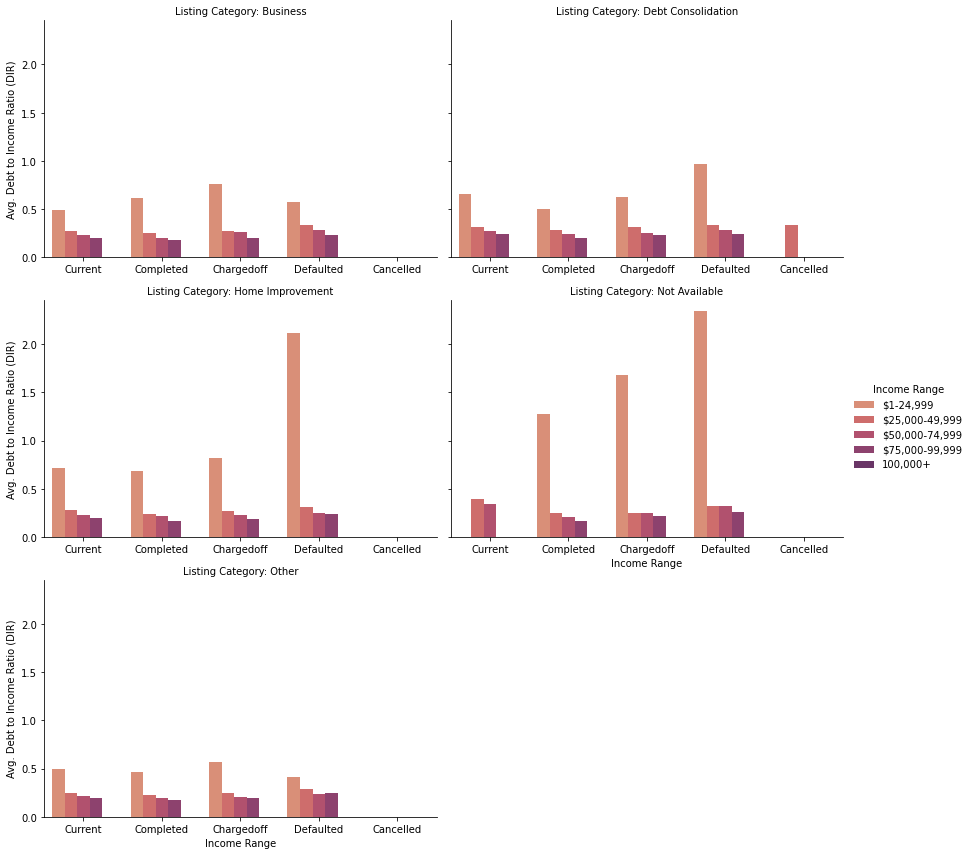

In [102]:
#List of x-values
income_range_xlist = ['$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999', '100,000+']
loan_order = ['Current', 'Completed', 'Chargedoff', 'Defaulted', 'Cancelled']

#Create sns.catplot() using the cleaned dataset df_prosper_clean
g = sns.catplot(
        x= 'loan_status', 
        y='debt_income_ratio', 
        data=df_dir_ls_lc_ir_2,
        hue='Income Range',
        hue_order=income_range_xlist,
        order= loan_order,
        #legend=False,
        sharex=False,
        #sharey=False, #Including this parameter better shows the length of the error bars for further investigation, 
                    #but can be misleading due to varied y-axis values
        palette= 'flare',
        height=4, 
        aspect=1.5,
        kind='bar', 
        col ='listing_category_name',
        col_wrap=2
)


g.set_titles(template='Listing Category: {col_name}')
g.set_ylabels(label='Avg. Debt to Income Ratio (DIR)')
g.set_xlabels(label='Income Range');
#g.set(ylim=(0, outlier_limit_dir)); 


**Observation**
- For the income range 1-24,999 we see a strong correlation between the Defaulted loan status and higher average debt to income ratios. It is here we see the average DIRs exceed the overall mean of the data set in each listing category.

- As expected, in each loan status within each listing category, we can see a negative correlation between the average debt to income ratios and income ranges


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Some of the correlations that were strengthened throughout this part of the investigation are as follows:

- **DIR, Loan Status, Income Range**: For borrowers that fell into lower income ranges, we see a correlation between higher average DIRs and negative loan statuses. These correlations were strengthened as we continually observed that borrowers with higher DIRs were more strongly correlated to Default or Charged off loan statuses.

- **Listing Category**: This feature proved to not have much bearing on the outcome of borrower loan statuses. Though it is interesting because we have the majority of data within the Debt Consolidation category. It was also strengthened that this category could better reflect correlations when making further investigations. We can see this supported by the fact that the error bars on the visualization are rather significant in size for data in the other listing categories. This means we cannot be as certain about using the data when investigating and making correlations between variables.


### Were there any interesting or surprising interactions between features?

It was surprising to see that the average DIR for the 1-24,999 income range was so much greater than the average DIRs amongst other income ranges. While it was expected that it would be higher, the fact that it was significantly higher in certain categories points to the possibility that outliers are likely present in those income ranges within the listing categories. This begs the question of whether there could be improvements to the data collection process as there were 363 outliers found previously in this analysis.

## Conclusions

> My initial thought that there would be a correlation between listing category and loan status did not come to fruition throughout this analysis. Whether the loan had a positive or negative status outcome was not strongly related to the listing category. Though, the listing category itself proved to be a good basis to help observe and strengthen other correlations. 
These included the correlation between DIR and loan status. A loan status that was either Defaulted or Chargedoff showed the borrower had a higher DIR (41% and 33% average DIR, respectively). 

> Another correlation observed within the top 5 listing categories was between income range, average DIR, and loan status. There was a strong negative correlation between income range and average DIR. Borrowers within the 1-24,999 income range had higher DIRs on average. This then correlated to the even high average DIRs observed for that income range within the Defaulted loan status. Thus, this points to a third variable that has strong correlations to closed loan status outcomes. 

> One conclusion for further investigation is to perform a further deep dive into the borrowers within the Debt Consolidation listing category. After cleaning the data, about 56% of borrower data came from that category alone! I believe by further inspecting correlations within this category, the company can better understand features that may predict how Current loans may result for the existing borrowers (as the majority of loans are under the 'Current' status). This can then lead to better decisions about how borrowers may be given acceptance or denial to loans provided by Prosper. 

> My suggestion for further improvement is to re-evaluate the 'Employment Status' variable. As it stands now, this variable is seemingly ambiguous. The reason for separating the statuses 'Full-time' and 'Part-time' vs 'Employed' not clear. Why were these statuses distinct? This made me hesitant to work with the variable as this could mean the data could be skewed with overlapping statuses. For instance, a borrower may have selected 'Employed' while also being a part-time worker. In this case, results for any of the statuses where overlap could occur may be skewed. Instead, it may provide more accuracy in the data to use the following Employment Status options for borrowers: Full-time, Part-time, Self-employed, Other, Retired, and Not employed. The removal of the general "Employed" status can more accurately contribute to the statistics and distribution of data within the Full-time and Part-time statuses.
